## Imports and I/O

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mod_name_dict = {
    'OLS': 'Linear: OLS',
    'LASSO': 'Linear: OLS',
    'PLS': 'Linear: PC',
    'PCR': 'Linear: PC',
    'SVR': 'Linear: SVR',
    'RF': 'Non-parametric: DT',
    'GBR': 'Non-parametric: DT',
    'HGBR': 'Non-parametric: DT'
}

cv_name_dict = {
    'Plot': 'Plot\n(random k-fold)',
    'Spatial': 'Pasture\n(spatial block)',
    'Ecosite': 'Ecosite\n(spatial strata)',
    'Year': 'Year\n(temporal)'
}

In [3]:
df_plot = pd.read_csv('./results/tmp/vor_2014_2023_cln_2024_04_04_transect_cv_Plot_tuneby_Plot_tmp.csv')
df_spatial = pd.read_csv('./results/tmp/vor_2014_2023_cln_2024_04_04_transect_cv_spatial_tuneby_spatial_tmp.csv')
df_ecosite = pd.read_csv('./results/tmp/vor_2014_2023_cln_2024_04_04_transect_cv_ecosite_tuneby_ecosite_tmp.csv')
df_year = pd.read_csv('./results/tmp/vor_2014_2023_cln_2024_04_04_transect_cv_Year_tuneby_Year_tmp.csv')

t_plot = pd.read_csv('./results/tables/ml_models/vor_2014_2023_cln_2024_04_04_transect_cv_Plot_tuneby_Plot_results_plot_yrly.csv')
t_spatial = pd.read_csv('./results/tables/ml_models/vor_2014_2023_cln_2024_04_04_transect_cv_spatial_tuneby_spatial_results_plot_yrly.csv')
t_ecosite = pd.read_csv('./results/tables/ml_models/vor_2014_2023_cln_2024_04_04_transect_cv_ecosite_tuneby_ecosite_results_plot_yrly.csv')
t_year = pd.read_csv('./results/tables/ml_models/vor_2014_2023_cln_2024_04_04_transect_cv_Year_tuneby_Year_results_plot_yrly.csv')

In [4]:
df_plot['cv'] = 'Plot'
df_spatial['cv'] = 'Spatial'
df_ecosite['cv'] = 'Ecosite'
df_year['cv'] = 'Year'

t_plot['cv'] = 'Plot'
t_spatial['cv'] = 'Spatial'
t_ecosite['cv'] = 'Ecosite'
t_year['cv'] = 'Year'

In [5]:
df_plot['kfold'] = pd.Categorical(df_plot['kfold'].astype(str),
                                  ['kfold'+str(x+1) for x in np.arange(len(df_plot['kfold'].unique()))])

In [6]:
t_all = pd.concat([t_plot, t_spatial, t_ecosite, t_year])
t_all = t_all[t_all['Source'].isin(['OLS', 'LASSO', 'PLS', 'PCR', 'SVR', 'RF', 'HGBR'])].copy()
t_all['Source_type'] = t_all['Source'].apply(lambda x: mod_name_dict[x])
t_all['cv'] = t_all['cv'].apply(lambda x: cv_name_dict[x])
#t_all['cv'] = t_all['cv'].apply(lambda x: 'Pasture\n(block)' if x == 'Spatial' else 'Plot\n(random k-fold)' if x == 'Plot' else x)
t_all.columns

Index(['Source', 'kfold', 'MAE', 'Bias', 'MAE_bt', 'MAE_pct', 'R^2', 'r', 'cv',
       'spatial', 'ecosite', 'Source_type'],
      dtype='object')

In [7]:
df_boots_yr_transect = pd.read_csv('./results/tmp/vor_bootstrap_by_year_transect_v2.csv')
df_boots_nyrs = pd.read_csv('./results/tmp/vor_bootstrap_pred_9yrs_transect.csv')

In [8]:
df_boots_yr_transect = df_boots_yr_transect[df_boots_yr_transect['Model'].isin(['OLS', 'LASSO', 'PLS', 'PCR', 'SVR', 'RF', 'HGBR'])].copy()
df_boots_yr_transect['Source_type'] = df_boots_yr_transect['Model'].apply(lambda x: mod_name_dict[x])

In [9]:
yr_n = 10

In [10]:
#all(df_boots_yr_transect[df_boots_yr_transect['numb_yrs'] == yr_n - 1].groupby('Model').count()['numb_yrs']/yr_n == 120)

In [11]:
df_boots_yr_transect[df_boots_yr_transect['numb_yrs'] == yr_n - 1].groupby('Model').count()['numb_yrs']/yr_n

Model
HGBR     1.0
LASSO    1.0
OLS      1.0
PCR      1.0
PLS      1.0
RF       1.0
SVR      1.0
Name: numb_yrs, dtype: float64

In [12]:
df_year['SVR_resid'] = df_year['SVR'] - df_year['Biomass_kg_ha']
df_year['PLS_resid'] = df_year['PLS'] - df_year['Biomass_kg_ha']

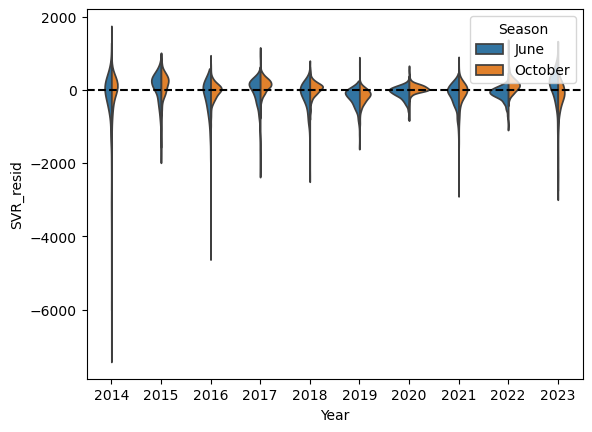

In [13]:
p = sns.violinplot(y='SVR_resid', x='Year', data=df_year, cut=0, split='Season', hue='Season', inner=None)
p.axhline(y=0, c='black', linestyle='dashed')

In [14]:
t_all['MAE_pct'] = t_all['MAE_pct']*100

## Aggregated models

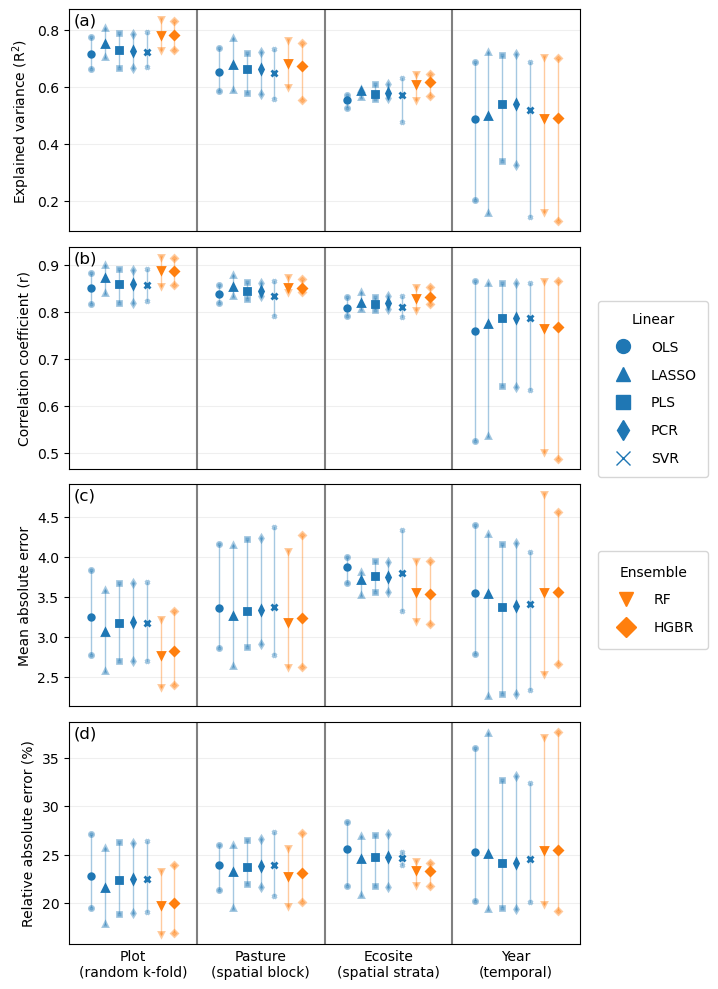

In [348]:
from matplotlib.lines import Line2D

#marker_list = ["o", "o", "o", "x", "o", "o", "x"]
#marker_list = ["^", "^", "^", "^", "^", "s", "s"]
marker_list = ["o", "^", "s", "d", "x", "v", "D"]
marker_colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:orange', 'tab:orange']

p_kwargs = dict(
    palette=marker_colors,
    markers=marker_list,
    dodge=0.65,
    linestyles="none", 
    #errorbar=None,
    legend=False
)

fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(6,10), sharex=True)
sns.pointplot(x='cv', y='R^2', data=t_all, hue='Source', 
              **p_kwargs,
              errorbar=lambda x: (np.min(x), np.max(x)),
              err_kws=dict(linewidth=1, alpha=0.4),
              markersize=4, 
              estimator='mean',
              ax=axs[0])
sns.pointplot(x='cv', y='R^2', data=t_all, hue='Source', 
              **p_kwargs,
              errorbar=None,
              markersize=3, 
              estimator='max',
              alpha=0.4,
              ax=axs[0])
sns.pointplot(x='cv', y='R^2', data=t_all, hue='Source', 
              **p_kwargs,
              errorbar=None,
              markersize=3, 
              estimator='min',
              alpha=0.4,
              ax=axs[0])

sns.pointplot(x='cv', y='r', data=t_all, hue='Source',
              **p_kwargs,
              errorbar=lambda x: (np.min(x), np.max(x)),
              err_kws=dict(linewidth=1, alpha=0.4),
              markersize=4, 
              estimator='mean',
              ax=axs[1])
sns.pointplot(x='cv', y='r', data=t_all, hue='Source',
              **p_kwargs,
              errorbar=None,
              markersize=3, 
              estimator='max',
              alpha=0.4,
              ax=axs[1])
sns.pointplot(x='cv', y='r', data=t_all, hue='Source',
              **p_kwargs,
              errorbar=None,
              markersize=3, 
              estimator='min',
              alpha=0.4,
              ax=axs[1])

sns.pointplot(x='cv', y='MAE', data=t_all, hue='Source', 
              **p_kwargs,
              errorbar=lambda x: (np.min(x), np.max(x)),
              err_kws=dict(linewidth=1, alpha=0.4),
              markersize=4, 
              estimator='mean',
              ax=axs[2])
sns.pointplot(x='cv', y='MAE', data=t_all, hue='Source', 
              **p_kwargs,
              errorbar=None,
              markersize=3, 
              estimator='max',
              alpha=0.4,
              ax=axs[2])
sns.pointplot(x='cv', y='MAE', data=t_all, hue='Source', 
              **p_kwargs,
              errorbar=None,
              markersize=3, 
              estimator='min',
              alpha=0.4,
              ax=axs[2])


sns.pointplot(x='cv', y='MAE_pct', data=t_all, hue='Source', 
              **p_kwargs,
              errorbar=lambda x: (np.min(x), np.max(x)),
              err_kws=dict(linewidth=1, alpha=0.4),
              markersize=4, 
              estimator='mean',
              ax=axs[3])
sns.pointplot(x='cv', y='MAE_pct', data=t_all, hue='Source', 
              **p_kwargs,
              errorbar=None,
              markersize=3, 
              estimator='max',
              alpha=0.4,
              ax=axs[3])
sns.pointplot(x='cv', y='MAE_pct', data=t_all, hue='Source', 
              **p_kwargs,
              errorbar=None,
              markersize=3, 
              estimator='min',
              alpha=0.4,
              ax=axs[3])

axs[0].set_ylabel('Explained variance (R$^2$)')
axs[1].set_ylabel('Correlation coefficient (r)')
axs[2].set_ylabel('Mean absolute error')
axs[3].set_ylabel('Relative absolute error (%)')

axs[3].set_xlabel('')
for label in axs[2].get_xticklabels():
    label.set_rotation(0)
    label.set_horizontalalignment('center')
for idx, ax in enumerate(axs.flatten()):
    ax.grid(visible=True, which='major', axis='y', alpha=0.2)
    ax.tick_params(axis='x', length=0)
    for v in [0.5, 1.5, 2.5]:
        ax.axvline(v, color='grey')
    ax.annotate(['(a)', '(b)', '(c)', '(d)'][idx], (0.01, 0.93), xycoords='axes fraction', fontsize=12)
#leg = axs[0].legend()
#fig.legend()
legend_elements = []
for m_idx, m in enumerate(marker_list):
    legend_elements.append(Line2D([0], [0], marker=m, color='w', 
                                  label=t_all['Source'].unique()[m_idx],
                                  mfc=marker_colors[m_idx],
                                  mec=marker_colors[m_idx],
                                  markersize=10))
#fig.legend(handles=legend_elements,
#           loc='upper center', ncols=len(marker_list),
#          bbox_to_anchor=(0.5, 1.06), borderpad=0.8)
fig.legend(handles=legend_elements[:-2],
           title='Linear',
           loc='outside right upper', ncols=1,
           bbox_to_anchor=(1.2, 0.7), 
           labelspacing=1,
           handletextpad=1,
           borderpad=0.8)
fig.legend(handles=legend_elements[-2:],
           title='Ensemble',
           loc='outside right upper', ncols=1,
           bbox_to_anchor=(1.2, 0.45), 
           labelspacing=1,
           handletextpad=1,
           borderpad=1.0)
plt.tight_layout()

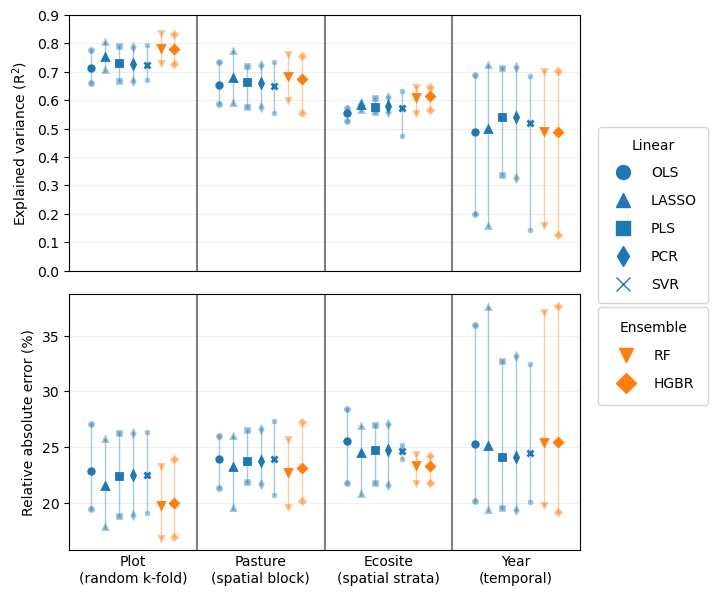

In [16]:
from matplotlib.lines import Line2D

#marker_list = ["o", "o", "o", "x", "o", "o", "x"]
#marker_list = ["^", "^", "^", "^", "^", "s", "s"]
marker_list = ["o", "^", "s", "d", "x", "v", "D"]
marker_colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:blue', 'tab:orange', 'tab:orange']

p_kwargs = dict(
    palette=marker_colors,
    markers=marker_list,
    dodge=0.65,
    linestyles="none", 
    #errorbar=None,
    legend=False
)

fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(6,6), sharex=True)
sns.pointplot(x='cv', y='R^2', data=t_all, hue='Source', 
              **p_kwargs,
              errorbar=lambda x: (np.min(x), np.max(x)),
              err_kws=dict(linewidth=1, alpha=0.4),
              markersize=4, 
              estimator='mean',
              ax=axs[0])
sns.pointplot(x='cv', y='R^2', data=t_all, hue='Source', 
              **p_kwargs,
              errorbar=None,
              markersize=3, 
              estimator='max',
              alpha=0.4,
              ax=axs[0])
sns.pointplot(x='cv', y='R^2', data=t_all, hue='Source', 
              **p_kwargs,
              errorbar=None,
              markersize=3, 
              estimator='min',
              alpha=0.4,
              ax=axs[0])

sns.pointplot(x='cv', y='MAE_pct', data=t_all, hue='Source', 
              **p_kwargs,
              errorbar=lambda x: (np.min(x), np.max(x)),
              err_kws=dict(linewidth=1, alpha=0.4),
              markersize=4, 
              estimator='mean',
              ax=axs[1])
sns.pointplot(x='cv', y='MAE_pct', data=t_all, hue='Source', 
              **p_kwargs,
              errorbar=None,
              markersize=3, 
              estimator='max',
              alpha=0.4,
              ax=axs[1])
sns.pointplot(x='cv', y='MAE_pct', data=t_all, hue='Source', 
              **p_kwargs,
              errorbar=None,
              markersize=3, 
              estimator='min',
              alpha=0.4,
              ax=axs[1])

axs[0].set_ylabel('Explained variance (R$^2$)')
axs[1].set_ylabel('Relative absolute error (%)')

axs[0].set_ylim((0.0, 0.9))

axs[1].set_xlabel('')

for ax in axs.flatten():
    ax.grid(visible=True, which='major', axis='y', alpha=0.2)
    ax.tick_params(axis='x', length=0)
    for v in [0.5, 1.5, 2.5]:
        ax.axvline(v, color='grey')
#leg = axs[0].legend()
#fig.legend()
legend_elements = []
for m_idx, m in enumerate(marker_list):
    legend_elements.append(Line2D([0], [0], marker=m, color='w', 
                                  label=t_all['Source'].unique()[m_idx],
                                  mfc=marker_colors[m_idx],
                                  mec=marker_colors[m_idx],
                                  markersize=10))
#fig.legend(handles=legend_elements,
#           loc='upper center', ncols=len(marker_list),
#          bbox_to_anchor=(0.5, 1.06), borderpad=0.8)
fig.legend(handles=legend_elements[:-2],
           title='Linear',
           loc='outside right upper', ncols=1,
           bbox_to_anchor=(1.2, 0.8), 
           labelspacing=1,
           handletextpad=1,
           borderpad=0.8)
fig.legend(handles=legend_elements[-2:],
           title='Ensemble',
           loc='outside right upper', ncols=1,
           bbox_to_anchor=(1.2, 0.5), 
           labelspacing=1,
           handletextpad=1,
           borderpad=1.0)
plt.tight_layout()

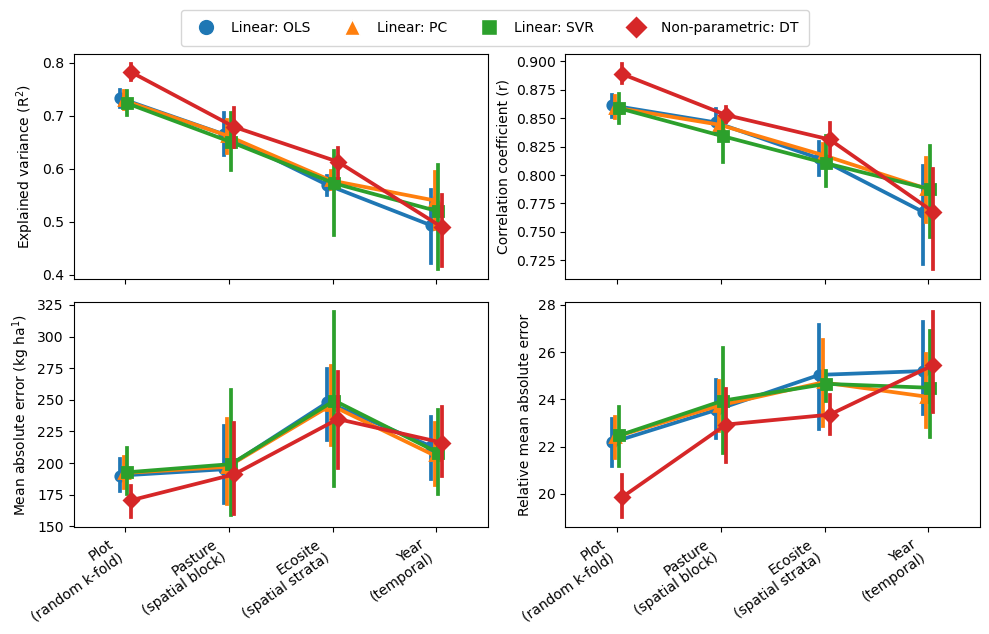

In [17]:
from matplotlib.lines import Line2D

marker_list = ["o", "^", "s", "D"]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,6), sharex=True)
sns.pointplot(x='cv', y='R^2', data=t_all, hue='Source_type', 
              ax=axs[0,0], legend=False, markers=marker_list, dodge=True)
sns.pointplot(x='cv', y='r', data=t_all, hue='Source_type',
              ax=axs[0,1], legend=False, markers=marker_list, dodge=True)
sns.pointplot(x='cv', y='MAE_bt', data=t_all, hue='Source_type', 
              ax=axs[1,0], legend=False, markers=marker_list, dodge=True)
sns.pointplot(x='cv', y='MAE_pct', data=t_all, hue='Source_type', 
              ax=axs[1,1], legend=False, markers=marker_list, dodge=True)
axs[0,0].set_ylabel('Explained variance (R$^2$)')
axs[0,1].set_ylabel('Correlation coefficient (r)')
axs[1,0].set_ylabel('Mean absolute error (kg ha$^1$)')
axs[1,1].set_ylabel('Relative mean absolute error')
for ax in axs[1,:].flatten():
    ax.set_xlabel('')
    for label in ax.get_xticklabels():
        label.set_rotation(35)
        label.set_ha('right')
legend_elements = []
for m_idx, m in enumerate(marker_list):
    legend_elements.append(Line2D([0], [0], marker=m, color='w', 
                                  label=t_all['Source_type'].unique()[m_idx],
                                  markerfacecolor=sns.color_palette("tab10")[m_idx],
                                  markersize=12))
fig.legend(handles=legend_elements,
           loc='upper center', ncols=len(marker_list),
           bbox_to_anchor=(0.5, 1.06), borderpad=0.8)
plt.tight_layout()

## PLS/PCA bi-plots

In [22]:
#https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import matplotlib as mpl

In [23]:
def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [24]:
var_names = ['NDVI', 'DFI', 'NDTI', 'SATVI', 'NDII7',
       'SAVI', 'RDVI', 'MTVI1', 'NCI', 'NDCI', 'PSRI', 'NDWI', 'EVI', 'TCBI',
       'TCGI', 'TCWI', 'BAI_126', 'BAI_136', 'BAI_146', 'BAI_236', 'BAI_246',
       'BAI_346', 'BLUE', 'GREEN', 'RED', 'NIR1', 'SWIR1', 'SWIR2']

In [25]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
from matplotlib.lines import Line2D
import re

In [26]:
def plot_pcs(df, ax, var_names, pc_type, var_reduce_type, k, vars_of_interest, title=None, n_comps=None, n_std=2.0, pcs=[1,2], topk=2):    
    # load data
    X = df[var_names]
    y = df['sqrt_Biomass_kg_ha']
    features = var_names
    X_scaled = StandardScaler().fit_transform(X)
    if n_comps is None:
        n_comps = len(var_names)
    pcs_idx = [i-1 for i in pcs]
    if pc_type == 'pca':
        features +=  ['sqrt_Biomass_kg_ha']
        # analysis
        pca = PCA(n_components=10).fit(np.concatenate([X_scaled, np.expand_dims(y, 1)], axis=1))
        X_reduced = pca.transform(np.concatenate([X_scaled, np.expand_dims(y, 1)], axis=1))
        # results
        scores = X_reduced[:, pcs_idx]
        loadings = pca.components_[pcs_idx].T
        pvars = pca.explained_variance_ratio_[pcs_idx] * 100
    elif pc_type == 'pls':
        pls2 = PLSRegression(n_components=n_comps)
        pls2.fit(X_scaled, y)
        loadings = pls2.x_loadings_[:,pcs_idx]
        scores = pls2.x_scores_[:, pcs_idx]
        naY = y
        r2_scores = []
        for i in range(0,n_comps):
            Y_pred=np.dot(pls2.x_scores_[:,i].reshape(-1,1),pls2.y_loadings_[:,i].reshape(-1,1).T)*naY.std(axis=0, ddof=1)+naY.mean(axis=0)
            r2_scores.append(round(r2_score(y,Y_pred),3))
        pvars = np.array(r2_scores)[pcs_idx]*100
    
    if var_reduce_type == 'top_k':
        tops = (loadings ** 2).sum(axis=1).argsort()[-topk:]
    elif var_reduce_type == 'manual':
        tops = [i for i, value in enumerate(features) if value in vars_of_interest]
    
    if pc_type == 'pca':
        tops = [x for x in tops if (x+1) != len(features)]
    arrows = loadings[tops]
    arrows /= np.sqrt((arrows ** 2).sum(axis=0))
    arrows *= np.abs(scores).max(axis=0)
    
    if pc_type == 'pca':
        bm_arrow = loadings[-1]
        bm_arrow /= np.sqrt((bm_arrow ** 2).sum(axis=0))
        bm_arrow *= np.abs(scores).max(axis=0)
    elif pc_type == 'pls':
        bm_arrow = pls2.y_loadings_[:,pcs_idx].squeeze()
        bm_arrow /= np.sqrt((bm_arrow ** 2).sum(axis=0))
        bm_arrow *= np.abs(scores).max(axis=0)
        #bm_arrow *= np.abs(pls2.y_scores_).max(axis=0)
    
    for idx, i in enumerate(pcs):
        df['PC'+str(i)] = scores[:,idx]
    
    #plt.scatter(scores[:, 0], scores[:,1], s=8, alpha=0.5)
    sns.scatterplot(x='PC'+str(pcs[0]), y='PC'+str(pcs[1]), data=df, hue='Season',
                    edgecolor='none', alpha=0.3, s=6, palette='Greys', ax=ax)
    #ax.legend(title=None, loc='lower center', ncols=5)
    width = -0.005 * np.min([np.subtract(*ax.get_xlim()), np.subtract(*ax.get_ylim())])
    for i, arrow in zip(tops, arrows):
        ax.arrow(0, 0, *arrow, color='k', alpha=0.75, width=width, ec='none',
                  length_includes_head=True)
        ax.text(*(arrow * 1.3), features[i], ha='center', va='center', color='k')
    ax.arrow(0, 0, *bm_arrow, color='grey', alpha=0.75, width=width, ec='none',
                  length_includes_head=True)
    ax.text(*(bm_arrow * 1.2), 'Biomass', ha='center', va='center', color='grey')

    ax.set_xlim((ax.get_xlim()[0]*1.15, ax.get_xlim()[1]*1.2))
    ax.set_ylim((ax.get_xlim()[0]*1.15, ax.get_xlim()[1]*1.2))
    
    for idx, axis in enumerate('xy'):
        #getattr(plt, f'{axis}ticks')([])
        getattr(ax, f'set_{axis}label')(f'PC{pcs[idx]} ({pvars[idx]:.2f}%)')
    custom_lines = []
    kfold_labels = []
    for i, k in enumerate(df['kfold'].sort_values().unique()):
        custom_lines.append(Line2D([0], [0], 
                                   color=mpl.colormaps['tab10'].colors[i],
                                   lw=3))
        confidence_ellipse(df['PC'+str(pcs[0])][df['kfold'] == k], 
                           df['PC'+str(pcs[1])][df['kfold'] == k], 
                           ax,
                           edgecolor=mpl.colormaps['tab10'].colors[i],
                           n_std=n_std)
        if type(k) == np.float_:
            kfold_labels.append(str(int(k)))
        elif 'kfold' in k:
            kfold_labels.append(re.sub('kfold', '', k))
        else:
            kfold_labels.append(str(k))
    ax.legend(custom_lines, kfold_labels, frameon=False)
    ax.set_title(title, y=1.0)
    return ax

In [27]:
names = ['Plot (random k-fold)', 'Pasture (spatial block)', 'Ecosite (spatial strata)', 'Year (temporal)']

In [28]:
df_plot['kfold'].unique()

['kfold1', 'kfold2', 'kfold3', 'kfold4', 'kfold9', 'kfold10', 'kfold7', 'kfold6', 'kfold8', 'kfold5']
Categories (10, object): ['kfold1', 'kfold2', 'kfold3', 'kfold4', ..., 'kfold7', 'kfold8', 'kfold9', 'kfold10']

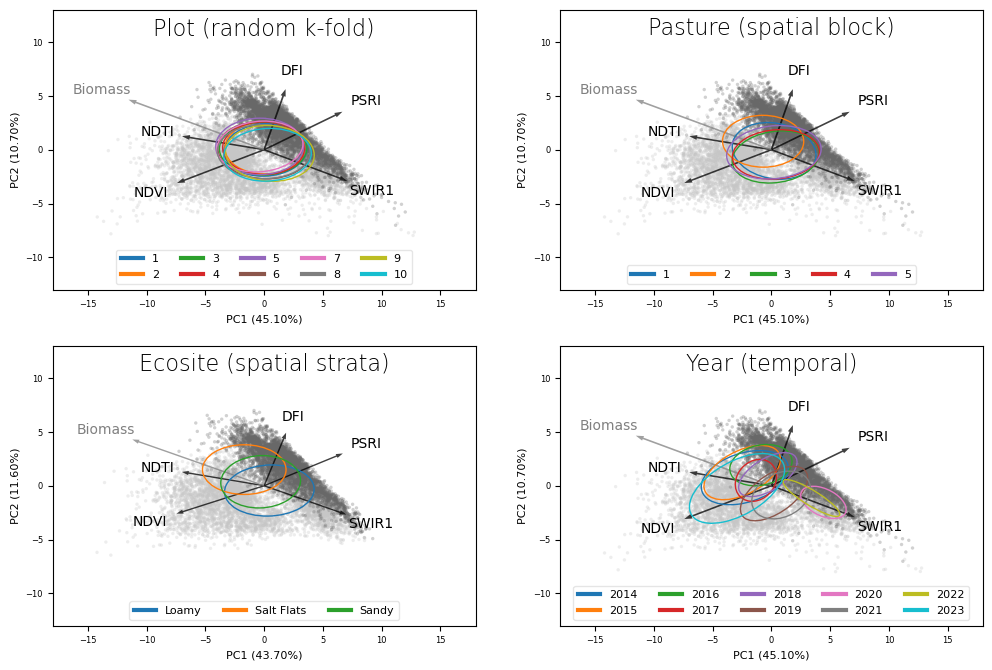

In [29]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for idx, df in enumerate([df_plot, df_spatial, df_ecosite, df_year]):
    df['sqrt_Biomass_kg_ha'] = np.sqrt(df['Biomass_kg_ha']) 
    plot_pcs(df=df,
             ax=axs.flatten()[idx],
             var_names=var_names,
             pc_type = 'pls',
             var_reduce_type = 'manual',
             k=None,
             vars_of_interest = ['NDVI', 'DFI', 'NDTI', 'SWIR1', 'PSRI'],
             #vars_of_interest = ['SWIR2', 'NDTI', 'TCWI', 'SWIR1', 'BLUE', 'TCBI', 'GREEN', 'DFI', 'RED'],
             title=names[idx],
             n_std=1.0,
             pcs=[1,2])
    leg = axs.flatten()[idx].get_legend()
    #if idx > 1:
    leg.set_loc('lower center')
    #handles, labels = axs.flatten()[idx].get_legend_handles_labels()
    axs.flatten()[idx].legend(leg.legend_handles,
                              [x.get_text() for x in leg.get_texts()], 
                              ncol=5, loc='lower center',
                              frameon=True, framealpha=0.5, 
                              fontsize=8)
    #else:
    #    leg.set_visible(False)
for ax in axs.flatten():
    ax.title.set(fontweight=10, fontsize=16, y=0.88)
    ax.tick_params(axis='x', labelsize=6)
    ax.tick_params(axis='y', labelsize=6)
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.set_xlim((-18, 18))
    ax.set_ylim((-13, 13))

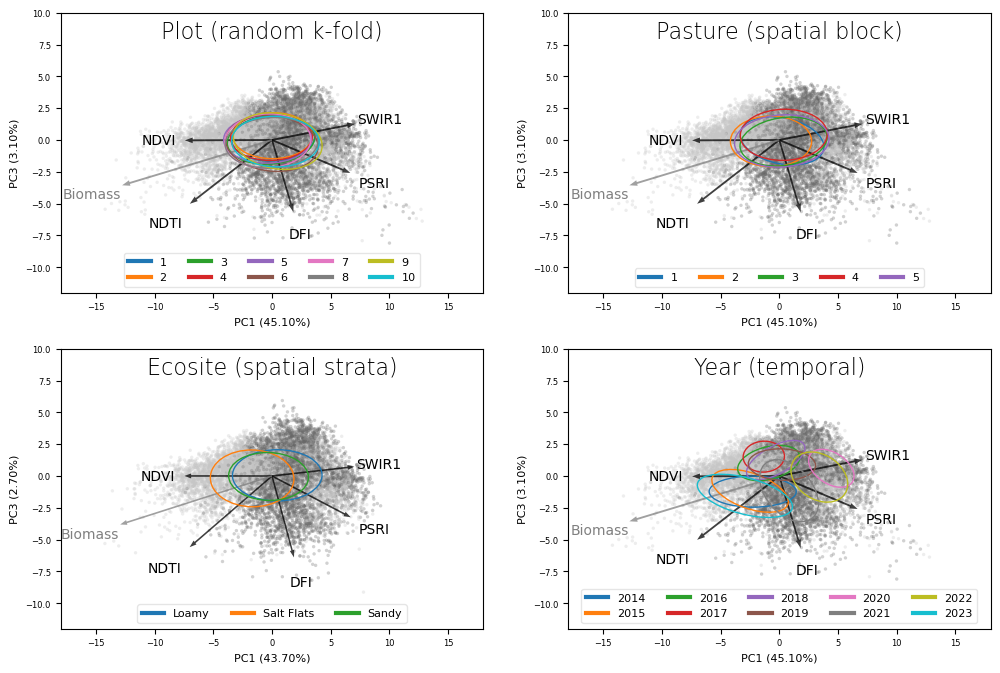

In [30]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for idx, df in enumerate([df_plot, df_spatial, df_ecosite, df_year]):
    df['sqrt_Biomass_kg_ha'] = np.sqrt(df['Biomass_kg_ha']) 
    plot_pcs(df=df,
             ax=axs.flatten()[idx],
             var_names=var_names,
             pc_type = 'pls',
             var_reduce_type = 'manual',
             k=None,
             vars_of_interest = ['NDVI', 'DFI', 'NDTI', 'SWIR1', 'PSRI'],
             #vars_of_interest = ['SWIR2', 'NDTI', 'TCWI', 'SWIR1', 'BLUE', 'TCBI', 'GREEN', 'DFI', 'RED'],
             title=names[idx],
             n_std=1.0,
             pcs=[1,3])
    leg = axs.flatten()[idx].get_legend()
    #if idx > 1:
    leg.set_loc('lower center')
    #handles, labels = axs.flatten()[idx].get_legend_handles_labels()
    axs.flatten()[idx].legend(leg.legend_handles,
                              [x.get_text() for x in leg.get_texts()], 
                              ncol=5, loc='lower center',
                              frameon=True, framealpha=0.5, 
                              fontsize=8)
    #else:
    #    leg.set_visible(False)
for ax in axs.flatten():
    ax.title.set(fontweight=10, fontsize=16, y=0.88)
    ax.tick_params(axis='x', labelsize=6)
    ax.tick_params(axis='y', labelsize=6)
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)
    ax.set_xlim((-18, 18))
    ax.set_ylim((-12, 10))

## Bootstrap by year

In [61]:
yr_type_dict = {
    2014: 'Wet',
    2015: 'Wet',
    2016: 'Average',
    2017: 'Average',
    2018: 'Average',
    2019: 'Average',
    2020: 'Dry',
    2021: 'Average',
    2022: 'Dry',
    2023: 'Wet'
}

drought_yrs = ['2020', '2022']
wet_yrs = ['2014', '2015', '2023']

In [62]:
df_boots_yr_transect = pd.read_csv('./results/tmp/vor_bootstrap_by_year_transect_v2.csv')
df_boots_nyrs = pd.read_csv('./results/tmp/vor_bootstrap_pred_9yrs_transect.csv')
df_boots_yr_transect = df_boots_yr_transect[df_boots_yr_transect['Model'].isin(['OLS', 'LASSO', 'PLS', 'PCR', 'SVR', 'RF', 'HGBR'])].copy()
df_boots_yr_transect['Source_type'] = df_boots_yr_transect['Model'].apply(lambda x: mod_name_dict[x])
yr_n = 10
df_boots_yr_transect[df_boots_yr_transect['numb_yrs'] == yr_n - 1].groupby('Model').count()['numb_yrs']/yr_n

Model
HGBR     1.0
LASSO    1.0
OLS      1.0
PCR      1.0
PLS      1.0
RF       1.0
SVR      1.0
Name: numb_yrs, dtype: float64

In [63]:
df_boots_yr_transect.loc[df_boots_yr_transect['R2_xfrm_plot'] < 0, 'R2_xfrm_plot'] = 0.0
df_boots_yr_transect['numb_yrs'] = df_boots_yr_transect['numb_yrs'].astype(str)
df_boots_yr_transect['MAE_pct_plot'] = df_boots_yr_transect['MAE_pct_plot'] * 100.0
df_boots_yr_transect['yr_type'] = df_boots_yr_transect['yr_test'].apply(lambda x: yr_type_dict[x])
df_boots_yr_transect['yr_test'] = df_boots_yr_transect['yr_test'].astype(str)

In [64]:
test = df_boots_yr_transect.value_counts(['numb_yrs', 'Model'], sort=False)
#test

In [65]:
df_boots_yr_transect.dtypes

Model                object
numb_yrs             object
yr_train             object
yr_test              object
retune_bootstrap       bool
MAE                 float64
MAPE                float64
MAE_pct             float64
R2                  float64
r_coef              float64
R2_xfrm             float64
r_coef_xfrm         float64
MAE_plot            float64
MAPE_plot           float64
MAE_pct_plot        float64
R2_plot             float64
r_coef_plot         float64
R2_xfrm_plot        float64
r_coef_xfrm_plot    float64
Source_type          object
yr_type              object
dtype: object

In [339]:
sub_models = ['OLS', 'LASSO', 'PLS', 'SVR', 'RF']
df_boots_yr_transect = df_boots_yr_transect[df_boots_yr_transect['Model'].isin(sub_models)].copy()
df_boots_yr_transect['Model'] = pd.Categorical(df_boots_yr_transect['Model'], sub_models)

In [340]:
t_year_yrly = pd.read_csv(
    './results/tables/ml_models/vor_2014_2023_cln_2024_04_04_transect_cv_Year_tuneby_Year_results_plot_yrly.csv')

t_year_yrly = t_year_yrly.drop(columns=['MAE', 'Bias']).rename(
    columns={'Source': 'Model',
             'kfold': 'yr_test',
             'MAE_bt': 'MAE_plot',
             'MAE_pct': 'MAE_pct_plot',
             'R^2': 'R2_plot',
             'r': 'r_coef_plot'})

t_year_yrly = t_year_yrly[t_year_yrly['Model'].isin(sub_models)]
t_year_yrly['yr_test'] = t_year_yrly['yr_test'].astype(int)
t_year_yrly['numb_yrs'] = 10

In [341]:
t_year_yrly.columns

Index(['Model', 'yr_test', 'MAE_plot', 'MAE_pct_plot', 'R2_plot',
       'r_coef_plot', 'numb_yrs'],
      dtype='object')

In [342]:
#df_boots_yr_transect = pd.concat([df_boots_yr_transect, t_year_yrly])

In [344]:
df_boots_drought = df_boots_yr_transect[df_boots_yr_transect['yr_test'].isin(drought_yrs)]
#df_boots_drought_notrain = df_boots_drought[~df_boots_drought['yr_train'].apply(lambda x: any([str(i) in x for i in drought_yrs]))]
df_boots_wet = df_boots_yr_transect[df_boots_yr_transect['yr_test'].isin(wet_yrs)]
#df_boots_wet_notrain = df_boots_wet[~df_boots_wet['yr_train'].apply(lambda x: any([str(i) in x for i in wet_yrs]))]
df_boots_avg = df_boots_yr_transect[~df_boots_yr_transect['yr_test'].isin(drought_yrs + wet_yrs)]

In [346]:
from matplotlib.ticker import MultipleLocator

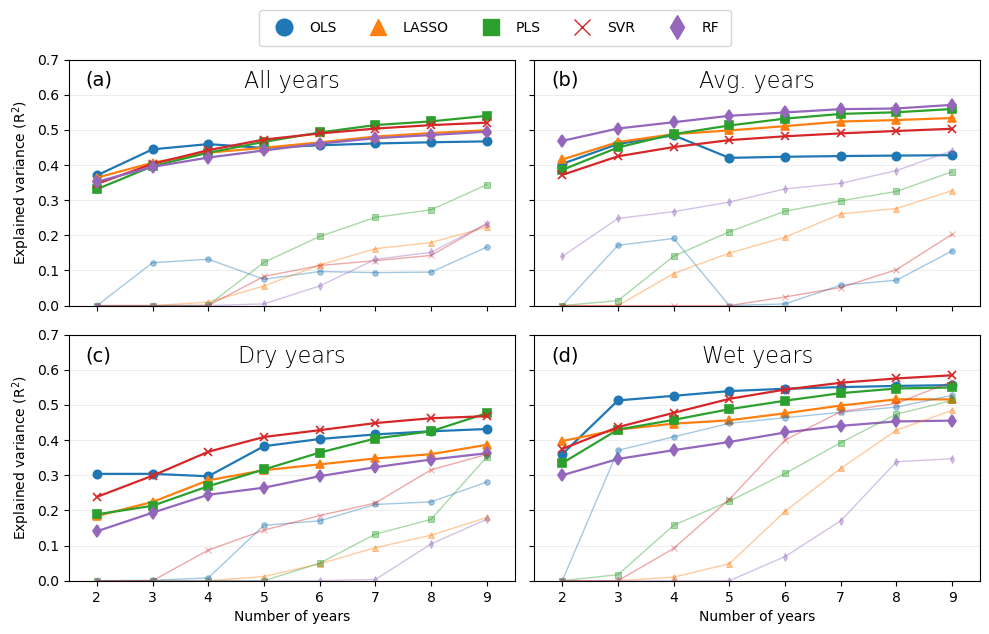

In [404]:
marker_list = ["o", "^", "s", "x", "d"]

p_kwargs = dict(
    estimator='mean',
    errorbar=None,
    markers=marker_list,
    linewidth=1.6, 
    markersize=6,
    dodge=0.0,
    legend=False
)

p_kwargs2 = dict(
    estimator=lambda x: np.percentile(x, 5),
    errorbar=None,
    markers=marker_list,
    linewidth=1.0, 
    linestyle='solid',
    markersize=4,
    alpha=0.4,
    dodge=0.0,
    legend=False
)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,6), sharey=True, sharex=True)
sns.pointplot(x='numb_yrs', y='R2_xfrm_plot',
              data=df_boots_yr_transect[df_boots_yr_transect['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[0,0], 
              **p_kwargs
             )
sns.pointplot(x='numb_yrs', y='R2_xfrm_plot',
              data=df_boots_yr_transect[df_boots_yr_transect['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[0,0], 
              **p_kwargs2
             )

sns.pointplot(x='numb_yrs', y='R2_xfrm_plot',
              data=df_boots_avg[df_boots_avg['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[0,1],
              **p_kwargs
             )
sns.pointplot(x='numb_yrs', y='R2_xfrm_plot',
              data=df_boots_avg[df_boots_avg['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[0,1],
              **p_kwargs2
             )

sns.pointplot(x='numb_yrs', y='R2_xfrm_plot',
              data=df_boots_drought[df_boots_drought['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[1,0], 
              **p_kwargs
             )
sns.pointplot(x='numb_yrs', y='R2_xfrm_plot',
              data=df_boots_drought[df_boots_drought['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[1,0], 
              **p_kwargs2
             )

sns.pointplot(x='numb_yrs', y='R2_xfrm_plot', 
              data=df_boots_wet[df_boots_wet['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[1,1], 
              **p_kwargs
             )
sns.pointplot(x='numb_yrs', y='R2_xfrm_plot', 
              data=df_boots_wet[df_boots_wet['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[1,1], 
              **p_kwargs2
             )

axs[0,0].set_title('All years', y=0.85)
axs[0,1].set_title('Avg. years', y=0.85)
axs[1,0].set_title('Dry years', y=0.85)
axs[1,1].set_title('Wet years', y=0.85)

axs[0,0].set_ylabel('Explained variance (R$^2$)')
axs[1,0].set_ylabel('Explained variance (R$^2$)')
axs[0,1].set_ylabel('')
axs[1,1].set_ylabel('')
for idx, ax in enumerate(axs.flatten()):
    ax.title.set(fontweight=10, fontsize=16)
    ax.yaxis.set_major_locator(MultipleLocator(0.1))
    ax.yaxis.grid(alpha=0.2)
    ax.set_ylim((0.0, 0.7))
    ax.annotate(['(a)', '(b)', '(c)', '(d)'][idx], (-0.2, 0.625), fontsize=14)
for ax in axs[1,:].flatten():
    ax.set_xlabel('Number of years')
legend_elements = []
for m_idx, m in enumerate(marker_list):
    legend_elements.append(Line2D([0], [0], marker=m, color='w', 
                                  label=sub_models[m_idx],
                                  mfc=sns.color_palette("tab10")[m_idx],
                                  mec=sns.color_palette("tab10")[m_idx],
                                  markersize=12))
fig.legend(handles=legend_elements,
           loc='upper center', ncols=len(marker_list),
           bbox_to_anchor=(0.5, 1.06), borderpad=0.8)
fig.tight_layout()

In [348]:
df_boots_wet.groupby('numb_yrs')['yr_train'].count()

numb_yrs
2     540
3    1260
4    1890
5    1890
6    1260
7     540
8     135
9      15
Name: yr_train, dtype: int64

In [349]:
df_wet_lwr_result

Model numb_yrs    yr  count  proportion
0    LASSO        2  2014      2    0.003704
1    LASSO        2  2015      0    0.000000
2    LASSO        2  2016      0    0.000000
3    LASSO        2  2017      2    0.003704
4    LASSO        2  2018      3    0.005556
..     ...      ...   ...    ...         ...
395    OLS        9  2019      1    0.066667
396    OLS        9  2020      1    0.066667
397    OLS        9  2021      1    0.066667
398    OLS        9  2022      1    0.066667
399    OLS        9  2023      1    0.066667

[400 rows x 5 columns]

In [350]:
#np.repeat(df_boots_wet_lwr['numb_yrs'].unique(), len(range(2014, 2024)))
#np.repeat(df_boots_wet_lwr['Model'].unique(), len(range(2014, 2024)) * len(df_boots_wet_lwr['numb_yrs'].unique()))
#len(list(np.repeat(df_boots_wet_lwr['numb_yrs'].unique(), len(range(2014, 2024)))) * len(df_boots_wet_lwr['Model'].unique()))
#len(list(range(2014, 2024)) * len(df_boots_wet_lwr['Model'].unique()) * len(df_boots_wet_lwr['numb_yrs'].unique()))
len(mods_list)

400

In [351]:
df_boots_wet['Model'].value_counts()

Model
OLS      1506
LASSO    1506
PLS      1506
SVR      1506
RF       1506
Name: count, dtype: int64

In [409]:
df_boots_avg['Model']

17         OLS
18       LASSO
19         PLS
21         SVR
22          RF
         ...  
40137      OLS
40138    LASSO
40139      PLS
40141      SVR
40142       RF
Name: Model, Length: 12550, dtype: category
Categories (5, object): ['OLS', 'LASSO', 'PLS', 'SVR', 'RF']

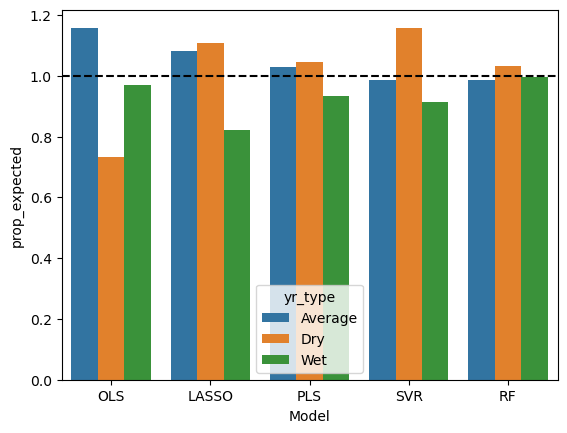

In [412]:
avg_lwr_mask = df_boots_avg['R2_xfrm_plot'] <= df_boots_avg.groupby(['Model', 'numb_yrs'], observed=False)['R2_xfrm_plot'].transform(
    lambda x: np.percentile(x, 5))
df_boots_avg_lwr = df_boots_avg[avg_lwr_mask].copy()
avg_lwr_result = []
mods_list = []
n_list = []
yr_list = []
total_possible_list = []
expected_list = []
for mod in df_boots_avg_lwr['Model'].unique():
    for n, grp in df_boots_avg_lwr[df_boots_avg_lwr['Model'] == mod].groupby('numb_yrs'):
        for yr in range(2014, 2024):
            avg_lwr_result.append(grp['yr_train'].apply(lambda x: str(yr) in x).sum())
            mods_list.append(mod)
            n_list.append(n)
            yr_list.append(yr)
            total_possible = len(
                df_boots_avg[(df_boots_avg['Model'] == mod) &
                (df_boots_avg['numb_yrs'] == n) & 
                df_boots_avg['yr_train'].str.contains(str(yr))])
            total_possible_list.append(total_possible)
            expected_list.append(total_possible * (len(grp) / len(df_boots_avg[(df_boots_avg['Model'] == mod) &
                                                       (df_boots_avg['numb_yrs'] == n)])))
df_avg_lwr_result = pd.DataFrame({
    'Model': pd.Categorical(mods_list, sub_models),
    'numb_yrs': n_list,
    'yr': yr_list,
    'count': avg_lwr_result,
    'total_possible': total_possible_list,
    'expected': expected_list
})
df_avg_lwr_result['numb_yrs'] = df_avg_lwr_result['numb_yrs'].astype(str)
df_avg_lwr_result['yr'] = df_avg_lwr_result['yr'].astype(str)
df_avg_lwr_result['yr_type'] = df_avg_lwr_result['yr'].apply(lambda x: yr_type_dict[int(x)])
df_avg_lwr_result_sum = df_avg_lwr_result.groupby(['Model', 'yr', 'yr_type'], observed=False).sum().reset_index()

df_avg_lwr_result_sum['proportion'] = df_avg_lwr_result_sum['count'] / df_avg_lwr_result_sum['total_possible']
df_avg_lwr_result_sum['prop_expected'] = df_avg_lwr_result_sum['count'] / df_avg_lwr_result_sum['expected']



#sns.catplot(data=df_avg_lwr_result.groupby(['Model', 'yr']).sum().reset_index(), kind='bar',
#            x='yr', y='count', estimator='mean', errorbar='sd', col='Model', col_wrap=3)

#sns.catplot(data=df_avg_lwr_result.groupby(['Model', 'yr', 'yr_type']).sum().reset_index(), kind='bar',
#            x='yr_type', y='count', estimator='sum', errorbar='sd', col='Model', col_wrap=3)

p = sns.barplot(data=df_avg_lwr_result_sum,
            x='Model', y='prop_expected', hue='yr_type', estimator='mean', errorbar=None)
p.axhline(y=1.0, linestyle='dashed', color='black')

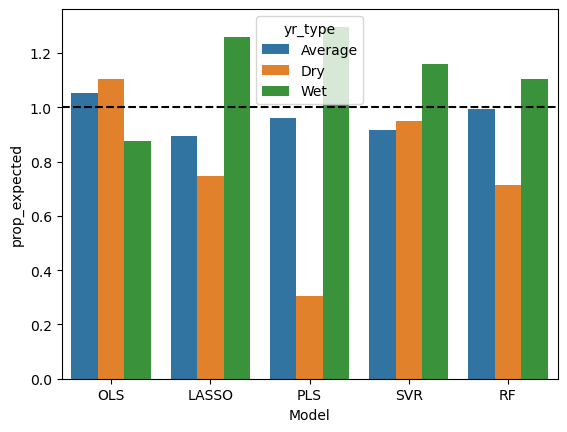

In [413]:
drought_lwr_mask = df_boots_drought['R2_xfrm_plot'] <= df_boots_drought.groupby(['Model', 'numb_yrs'], observed=False)['R2_xfrm_plot'].transform(
    lambda x: np.percentile(x, 5))
df_boots_drought_lwr = df_boots_drought[drought_lwr_mask].copy()
drought_lwr_result = []
mods_list = []
n_list = []
yr_list = []
total_possible_list = []
expected_list = []
for mod in df_boots_drought_lwr['Model'].unique():
    for n, grp in df_boots_drought_lwr[df_boots_drought_lwr['Model'] == mod].groupby('numb_yrs'):
        for yr in range(2014, 2024):
            drought_lwr_result.append(grp['yr_train'].apply(lambda x: str(yr) in x).sum())
            mods_list.append(mod)
            n_list.append(n)
            yr_list.append(yr)
            total_possible = len(
                df_boots_drought[(df_boots_drought['Model'] == mod) &
                (df_boots_drought['numb_yrs'] == n) & 
                df_boots_drought['yr_train'].str.contains(str(yr))])
            total_possible_list.append(total_possible)
            expected_list.append(total_possible * (len(grp) / len(df_boots_drought[(df_boots_drought['Model'] == mod) &
                                                       (df_boots_drought['numb_yrs'] == n)])))
df_drought_lwr_result = pd.DataFrame({
    'Model': pd.Categorical(mods_list, sub_models),
    'numb_yrs': n_list,
    'yr': yr_list,
    'count': drought_lwr_result,
    'total_possible': total_possible_list,
    'expected': expected_list
})
df_drought_lwr_result['numb_yrs'] = df_drought_lwr_result['numb_yrs'].astype(str)
df_drought_lwr_result['yr'] = df_drought_lwr_result['yr'].astype(str)
df_drought_lwr_result['yr_type'] = df_drought_lwr_result['yr'].apply(lambda x: yr_type_dict[int(x)])
df_drought_lwr_result_sum = df_drought_lwr_result.groupby(['Model', 'yr', 'yr_type'], observed=False).sum().reset_index()

df_drought_lwr_result_sum['proportion'] = df_drought_lwr_result_sum['count'] / df_drought_lwr_result_sum['total_possible']
df_drought_lwr_result_sum['prop_expected'] = df_drought_lwr_result_sum['count'] / df_drought_lwr_result_sum['expected']


#sns.catplot(data=df_drought_lwr_result.groupby(['Model', 'yr']).sum().reset_index(), kind='bar',
#            x='yr', y='count', estimator='mean', errorbar='sd', col='Model', col_wrap=3)

#sns.catplot(data=df_drought_lwr_result.groupby(['Model', 'yr', 'yr_type']).sum().reset_index(), kind='bar',
#            x='yr_type', y='count', estimator='sum', errorbar='sd', col='Model', col_wrap=3)

p = sns.barplot(data=df_drought_lwr_result_sum,
            x='Model', y='prop_expected', hue='yr_type', estimator='mean', errorbar=None)
p.axhline(y=1.0, linestyle='dashed', color='black')

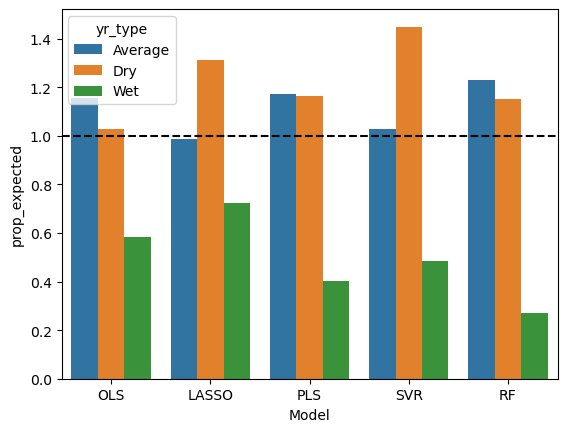

In [414]:
wet_lwr_mask = df_boots_wet['R2_xfrm_plot'] <= df_boots_wet.groupby(['Model', 'numb_yrs'], observed=False)['R2_xfrm_plot'].transform(
    lambda x: np.percentile(x, 5))
df_boots_wet_lwr = df_boots_wet[wet_lwr_mask].copy()
wet_lwr_result = []
mods_list = []
n_list = []
yr_list = []
total_possible_list = []
expected_list = []
for mod in df_boots_wet_lwr['Model'].unique():
    for n, grp in df_boots_wet_lwr[df_boots_wet_lwr['Model'] == mod].groupby('numb_yrs'):
        for yr in range(2014, 2024):
            wet_lwr_result.append(grp['yr_train'].apply(lambda x: str(yr) in x).sum())
            mods_list.append(mod)
            n_list.append(n)
            yr_list.append(yr)
            total_possible = len(
                df_boots_wet[(df_boots_wet['Model'] == mod) &
                (df_boots_wet['numb_yrs'] == n) & 
                df_boots_wet['yr_train'].str.contains(str(yr))])
            total_possible_list.append(total_possible)
            expected_list.append(total_possible * (len(grp) / len(df_boots_wet[(df_boots_wet['Model'] == mod) &
                                                       (df_boots_wet['numb_yrs'] == n)])))
df_wet_lwr_result = pd.DataFrame({
    'Model': pd.Categorical(mods_list, sub_models),
    'numb_yrs': n_list,
    'yr': yr_list,
    'count': wet_lwr_result,
    'total_possible': total_possible_list,
    'expected': expected_list
})
df_wet_lwr_result['numb_yrs'] = df_wet_lwr_result['numb_yrs'].astype(str)
df_wet_lwr_result['yr'] = df_wet_lwr_result['yr'].astype(str)
df_wet_lwr_result['yr_type'] = df_wet_lwr_result['yr'].apply(lambda x: yr_type_dict[int(x)])
df_wet_lwr_result_sum = df_wet_lwr_result.groupby(['Model', 'yr', 'yr_type'], observed=False).sum().reset_index()

df_wet_lwr_result_sum['proportion'] = df_wet_lwr_result_sum['count'] / df_wet_lwr_result_sum['total_possible']
df_wet_lwr_result_sum['prop_expected'] = df_wet_lwr_result_sum['count'] / df_wet_lwr_result_sum['expected']


#sns.catplot(data=df_wet_lwr_result.groupby(['Model', 'yr']).sum().reset_index(), kind='bar',
#            x='yr', y='count', estimator='mean', errorbar='sd', col='Model', col_wrap=3)

#sns.catplot(data=df_wet_lwr_result.groupby(['Model', 'yr', 'yr_type']).sum().reset_index(), kind='bar',
#            x='yr_type', y='count', estimator='sum', errorbar='sd', col='Model', col_wrap=3)

p = sns.barplot(data=df_wet_lwr_result_sum,
            x='Model', y='prop_expected', hue='yr_type', estimator='mean', errorbar=None)
p.axhline(y=1.0, linestyle='dashed', color='black')

/project/cper_neon_aop/conda_envs/py_ml_env/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
/project/cper_neon_aop/conda_envs/py_ml_env/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 0.98, 'Testing years for "worst-case" models (< 5th percentile)')

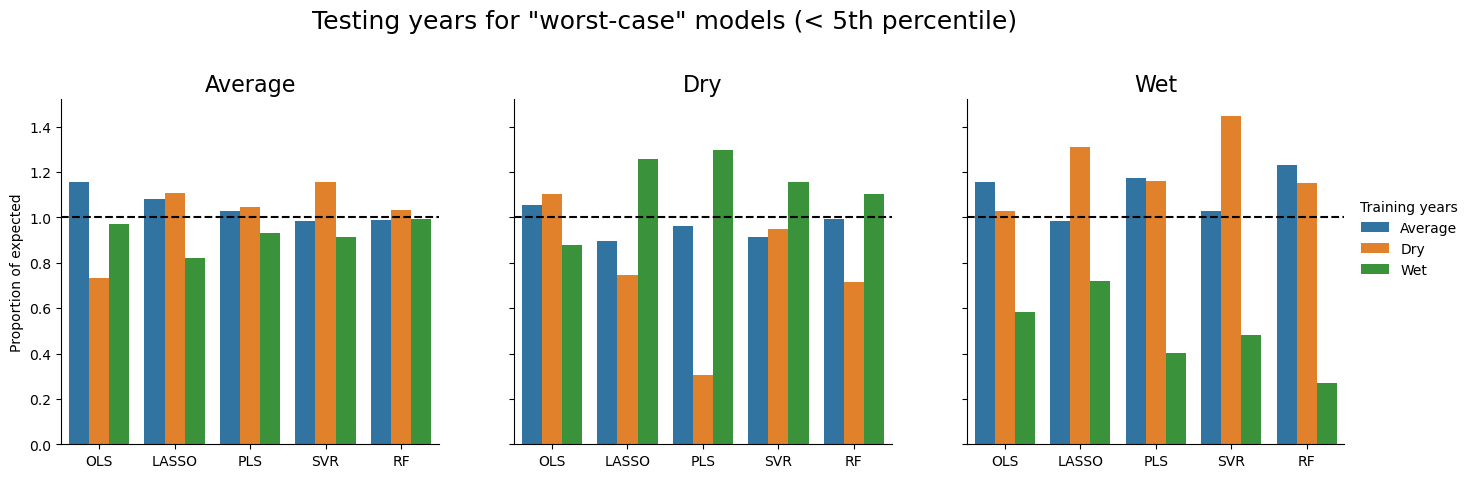

In [443]:
df_avg_lwr_result_sum['test_type'] = 'Average'
df_drought_lwr_result_sum['test_type'] = 'Dry'
df_wet_lwr_result_sum['test_type'] = 'Wet'

df_lwr_result_sum = pd.concat([df_avg_lwr_result_sum, df_drought_lwr_result_sum, df_wet_lwr_result_sum], ignore_index=True)
p = sns.catplot(data=df_lwr_result_sum, kind='bar',
                x='Model', y='prop_expected', hue='yr_type', 
                col='test_type', estimator='mean', errorbar=None,
                facet_kws={'gridspec_kws': {'wspace':0.2}}
               )
p.set_titles("{col_name}")
p.set_ylabels("Proportion of expected")
p.set_xlabels("")
p._legend.set_title("Training years")
#p.set_title("Testing years")
for ax in p.axes.flatten():
    ax.axhline(y=1.0, linestyle='dashed', color='black')
    ax.set_title(ax.get_title(), fontsize=16)

p.fig.subplots_adjust(top=0.8) # adjust the Figure in rp
p.fig.suptitle('Testing years for "worst-case" models (< 5th percentile)', fontsize=18)
#p.fig.tight_layout()

In [389]:
df_wet_lwr_result_sum

Model    yr  yr_type  numb_yrs  count  total_possible   expected
0   LASSO  2014      Wet  23456789     31             510  27.703704
1   LASSO  2015      Wet  23456789     29             510  27.703704
2   LASSO  2016  Average  23456789     53             765  41.555556
3   LASSO  2017  Average  23456789     45             765  41.555556
4   LASSO  2018  Average  23456789     53             765  41.555556
5   LASSO  2019  Average  23456789     10             765  41.555556
6   LASSO  2020      Dry  23456789     69             765  41.555556
7   LASSO  2021  Average  23456789     44             765  41.555556
8   LASSO  2022      Dry  23456789     40             765  41.555556
9   LASSO  2023      Wet  23456789      0             510  27.703704
10    OLS  2014      Wet  23456789     42             510  27.925926
11    OLS  2015      Wet  23456789      5             510  27.925926
12    OLS  2016  Average  23456789     54             765  41.888889
13    OLS  2017  Average  23456789     26             765  41.888889
14    OLS  2018  Average  23456789     62             765  41.888889
15    OLS  2019  Average  23456789     51             765  41.888889
16    OLS  2020      Dry  23456789     54             765  41.888889
17    OLS  2021  Average  23456789     49             765  41.888889
18    OLS  2022      Dry  23456789     32             765  41.888889
19    OLS  2023      Wet  23456789      2             510  27.925926
20    PLS  2014      Wet  23456789     32             510  28.962963
21    PLS  2015      Wet  23456789      3             510  28.962963
22    PLS  2016  Average  23456789     43             765  43.444444
23    PLS  2017  Average  23456789     56             765  43.444444
24    PLS  2018  Average  23456789     59             765  43.444444
25    PLS  2019  Average  23456789     52             765  43.444444
26    PLS  2020      Dry  23456789     52             765  43.444444
27    PLS  2021  Average  23456789     45             765  43.444444
28    PLS  2022      Dry  23456789     49             765  43.444444
29    PLS  2023      Wet  23456789      0             510  28.962963
30     RF  2014      Wet  23456789     28             510  37.037037
31     RF  2015      Wet  23456789      2             510  37.037037
32     RF  2016  Average  23456789     82             765  55.555556
33     RF  2017  Average  23456789     61             765  55.555556
34     RF  2018  Average  23456789     77             765  55.555556
35     RF  2019  Average  23456789     49             765  55.555556
36     RF  2020      Dry  23456789     68             765  55.555556
37     RF  2021  Average  23456789     73             765  55.555556
38     RF  2022      Dry  23456789     60             765  55.555556
39     RF  2023      Wet  23456789      0             510  37.037037
40    SVR  2014      Wet  23456789     26             510  30.370370
41    SVR  2015      Wet  23456789     15             510  30.370370
42    SVR  2016  Average  23456789     44             765  45.555556
43    SVR  2017  Average  23456789     66             765  45.555556
44    SVR  2018  Average  23456789     50             765  45.555556
45    SVR  2019  Average  23456789     39             765  45.555556
46    SVR  2020      Dry  23456789     60             765  45.555556
47    SVR  2021  Average  23456789     35             765  45.555556
48    SVR  2022      Dry  23456789     72             765  45.555556
49    SVR  2023      Wet  23456789      3             510  30.370370

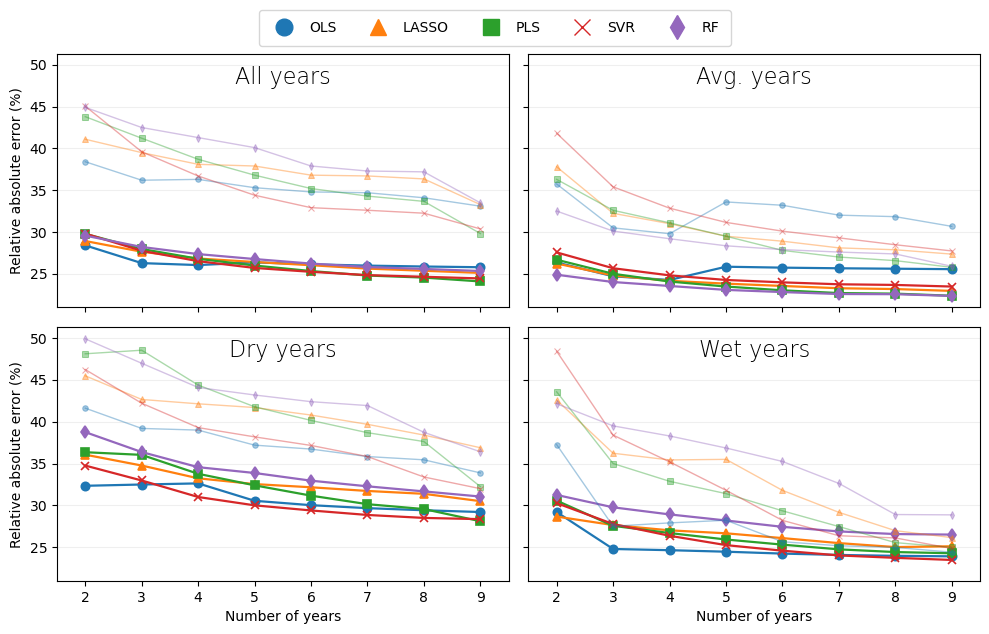

In [260]:
marker_list = ["o", "^", "s", "x", "d"]

p_kwargs = dict(
    estimator='mean',
    errorbar=None,
    markers=marker_list,
    linewidth=1.6, 
    markersize=6,
    dodge=0.0,
    legend=False
)

p_kwargs2 = dict(
    estimator=lambda x: np.percentile(x, 95),
    errorbar=None,
    markers=marker_list,
    linewidth=1.0, 
    linestyle='solid',
    markersize=4,
    alpha=0.4,
    dodge=0.0,
    legend=False
)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,6), sharey=True, sharex=True)
sns.pointplot(x='numb_yrs', y='MAE_pct_plot',
              data=df_boots_yr_transect[df_boots_yr_transect['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[0,0], 
              **p_kwargs
             )
sns.pointplot(x='numb_yrs', y='MAE_pct_plot',
              data=df_boots_yr_transect[df_boots_yr_transect['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[0,0], 
              **p_kwargs2
             )

sns.pointplot(x='numb_yrs', y='MAE_pct_plot',
              data=df_boots_avg[df_boots_avg['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[0,1],
              **p_kwargs
             )
sns.pointplot(x='numb_yrs', y='MAE_pct_plot',
              data=df_boots_avg[df_boots_avg['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[0,1],
              **p_kwargs2
             )

sns.pointplot(x='numb_yrs', y='MAE_pct_plot',
              data=df_boots_drought[df_boots_drought['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[1,0], 
              **p_kwargs
             )
sns.pointplot(x='numb_yrs', y='MAE_pct_plot',
              data=df_boots_drought[df_boots_drought['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[1,0], 
              **p_kwargs2
             )

sns.pointplot(x='numb_yrs', y='MAE_pct_plot', 
              data=df_boots_wet[df_boots_wet['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[1,1], 
              **p_kwargs
             )
sns.pointplot(x='numb_yrs', y='MAE_pct_plot', 
              data=df_boots_wet[df_boots_wet['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[1,1], 
              **p_kwargs2
             )

axs[0,0].set_title('All years', y=0.85)
axs[0,1].set_title('Avg. years', y=0.85)
axs[1,0].set_title('Dry years', y=0.85)
axs[1,1].set_title('Wet years', y=0.85)

axs[0,0].set_ylabel('Relative absolute error (%)')
axs[1,0].set_ylabel('Relative absolute error (%)')
axs[0,1].set_ylabel('')
axs[1,1].set_ylabel('')
for ax in axs.flatten():
    ax.title.set(fontweight=10, fontsize=16)
    #ax.yaxis.set_major_locator(MultipleLocator(0.1))
    ax.yaxis.grid(alpha=0.2)
    #ax.set_ylim((0.0, 0.7))
for ax in axs[1,:].flatten():
    ax.set_xlabel('Number of years')
legend_elements = []
for m_idx, m in enumerate(marker_list):
    legend_elements.append(Line2D([0], [0], marker=m, color='w', 
                                  label=sub_models[m_idx],
                                  mfc=sns.color_palette("tab10")[m_idx],
                                  mec=sns.color_palette("tab10")[m_idx],
                                  markersize=12))
fig.legend(handles=legend_elements,
           loc='upper center', ncols=len(marker_list),
           bbox_to_anchor=(0.5, 1.06), borderpad=0.8)
fig.tight_layout()

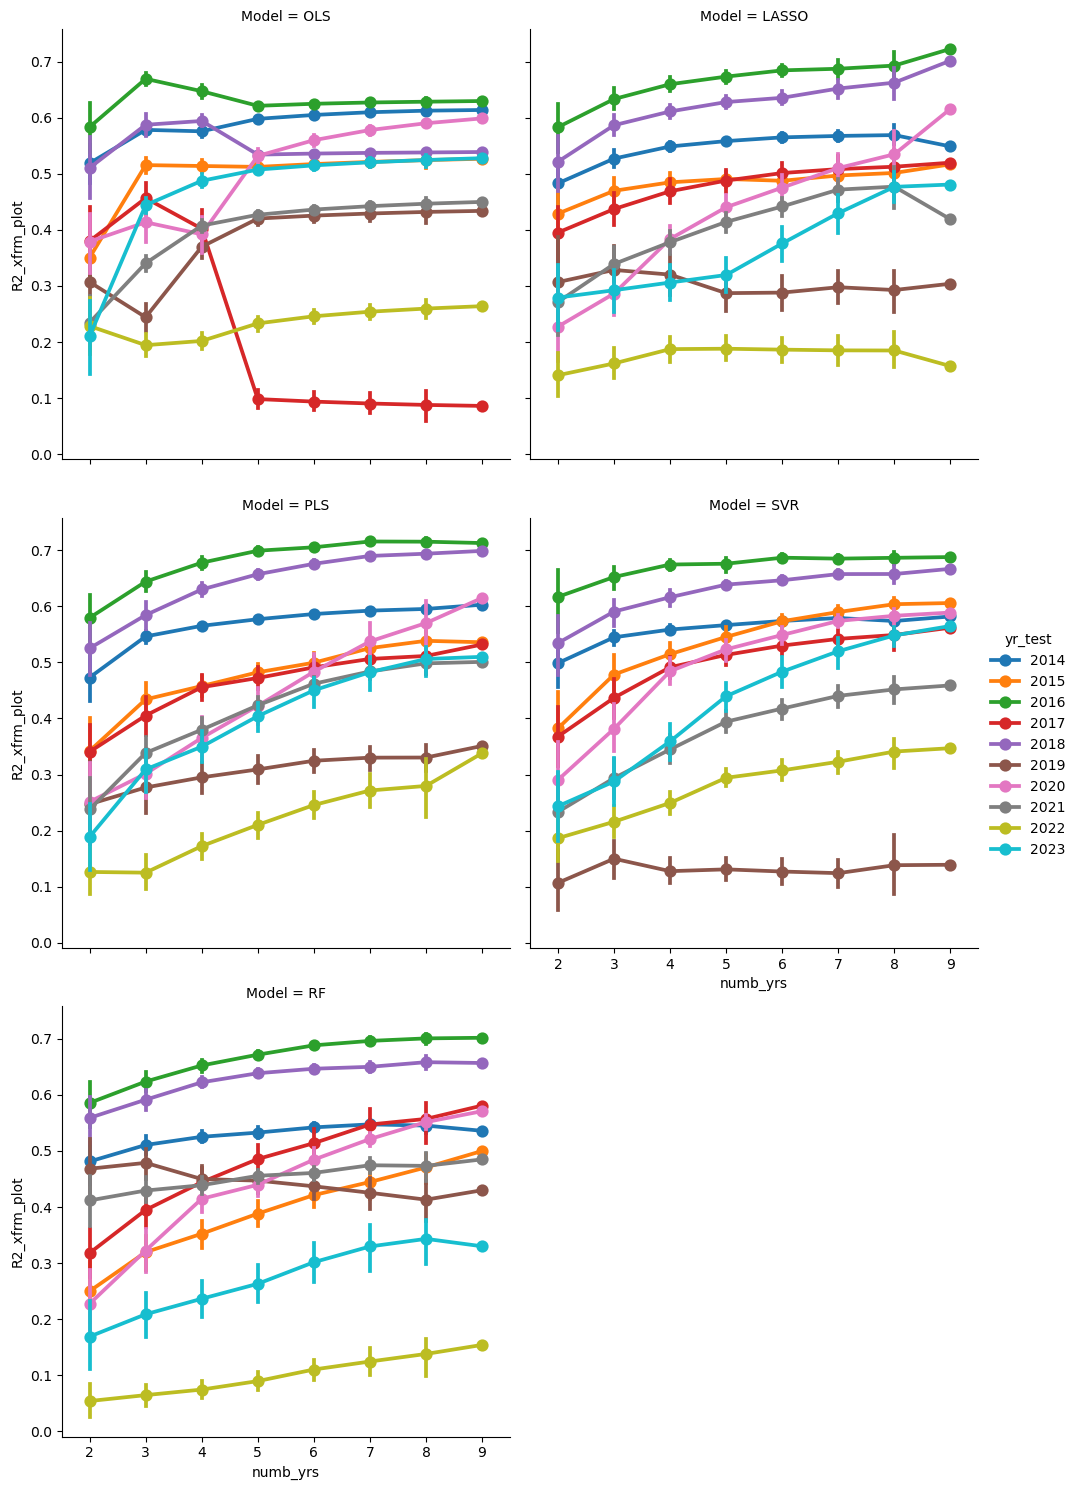

In [83]:
#fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,6), sharey=True, sharex=True)
sns.catplot(x='numb_yrs', y='R2_xfrm_plot',
              data=df_boots_yr_transect[df_boots_yr_transect['Model'].isin(sub_models)],
              hue='yr_test',
            col='Model', col_wrap=2, kind='point'
             )

In [48]:
df_boots_yr_transect.columns

Index(['Model', 'numb_yrs', 'yr_train', 'yr_test', 'retune_bootstrap', 'MAE',
       'MAPE', 'MAE_pct', 'R2', 'r_coef', 'R2_xfrm', 'r_coef_xfrm', 'MAE_plot',
       'MAPE_plot', 'MAE_pct_plot', 'R2_plot', 'r_coef_plot', 'R2_xfrm_plot',
       'r_coef_xfrm_plot', 'Source_type'],
      dtype='object')

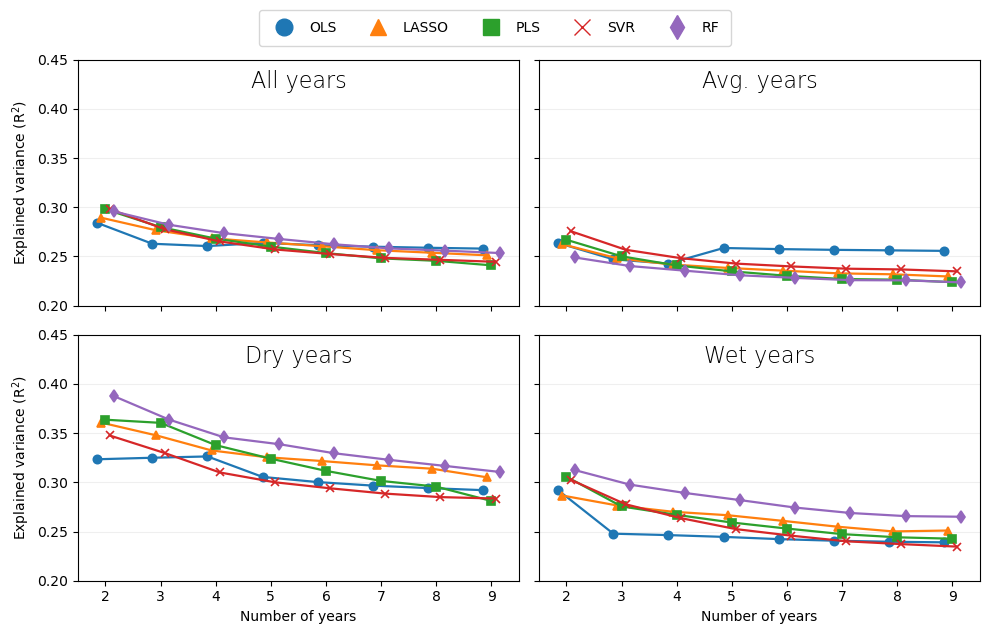

In [52]:
marker_list = ["o", "^", "s", "x", "d"]

p_kwargs = dict(
    estimator='mean',
    errorbar=None,
    markers=marker_list,
    linewidth=1.6, 
    markersize=6,
    dodge=0.3,
    legend=False
)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,6), sharey=True, sharex=True)
sns.pointplot(x='numb_yrs', y='MAE_pct_plot',
              data=df_boots_yr_transect[df_boots_yr_transect['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[0,0], 
              **p_kwargs
             )
sns.pointplot(x='numb_yrs', y='MAE_pct_plot',
              data=df_boots_avg[df_boots_avg['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[0,1],
              **p_kwargs
             )
sns.pointplot(x='numb_yrs', y='MAE_pct_plot',
              data=df_boots_drought[df_boots_drought['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[1,0], 
              **p_kwargs
             )
sns.pointplot(x='numb_yrs', y='MAE_pct_plot', 
              data=df_boots_wet[df_boots_wet['Model'].isin(sub_models)],
              hue='Model', 
              ax=axs[1,1], 
              **p_kwargs
             )

axs[0,0].set_title('All years', y=0.85)
axs[0,1].set_title('Avg. years', y=0.85)
axs[1,0].set_title('Dry years', y=0.85)
axs[1,1].set_title('Wet years', y=0.85)

axs[0,0].set_ylabel('Explained variance (R$^2$)')
axs[1,0].set_ylabel('Explained variance (R$^2$)')
axs[0,1].set_ylabel('')
axs[1,1].set_ylabel('')
for ax in axs.flatten():
    ax.title.set(fontweight=10, fontsize=16)
    ax.yaxis.set_major_locator(MultipleLocator(0.05))
    ax.yaxis.grid(alpha=0.2)
    ax.set_ylim((0.2, 0.45))
for ax in axs[1,:].flatten():
    ax.set_xlabel('Number of years')
legend_elements = []
for m_idx, m in enumerate(marker_list):
    legend_elements.append(Line2D([0], [0], marker=m, color='w', 
                                  label=sub_models[m_idx],
                                  mfc=sns.color_palette("tab10")[m_idx],
                                  mec=sns.color_palette("tab10")[m_idx],
                                  markersize=12))
fig.legend(handles=legend_elements,
           loc='upper center', ncols=len(marker_list),
           bbox_to_anchor=(0.5, 1.06), borderpad=0.8)
fig.tight_layout()

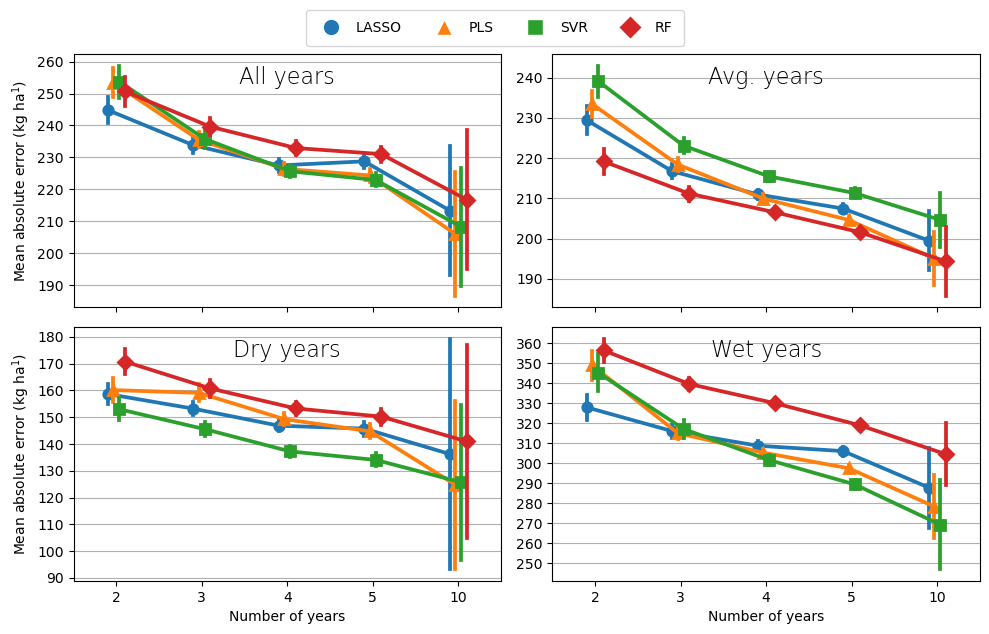

In [35]:
marker_list = ["o", "^", "s", "D"]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,6), sharey=False, sharex=True)
sns.pointplot(x='numb_yrs', y='MAE_plot',
              data=df_boots_yr_transect[df_boots_yr_transect['Model'].isin(sub_models)],
              hue='Model', 
              errorbar=('se', 1),
              ax=axs[0,0], legend=False, markers=marker_list, dodge=0.2)
sns.pointplot(x='numb_yrs', y='MAE_plot',
              data=df_boots_avg[df_boots_avg['Model'].isin(sub_models)],
              hue='Model', 
              errorbar=('se', 1),
              ax=axs[0,1], legend=False, markers=marker_list, dodge=0.2)
sns.pointplot(x='numb_yrs', y='MAE_plot',
              data=df_boots_drought[df_boots_drought['Model'].isin(sub_models)],
              hue='Model', 
              errorbar=('se', 1),
              ax=axs[1,0], legend=False, markers=marker_list, dodge=0.2)
sns.pointplot(x='numb_yrs', y='MAE_plot', 
              data=df_boots_wet[df_boots_wet['Model'].isin(sub_models)],
              hue='Model', 
              errorbar=('se', 1),
              ax=axs[1,1], legend=False, markers=marker_list, dodge=0.2)

axs[0,0].set_title('All years', y=0.85)
axs[0,1].set_title('Avg. years', y=0.85)
axs[1,0].set_title('Dry years', y=0.85)
axs[1,1].set_title('Wet years', y=0.85)

axs[0,0].set_ylabel('Mean absolute error (kg ha$^1$)')
axs[1,0].set_ylabel('Mean absolute error (kg ha$^1$)')
axs[0,1].set_ylabel('')
axs[1,1].set_ylabel('')
for ax in axs.flatten():
    ax.title.set(fontweight=10, fontsize=16)
    ax.yaxis.set_major_locator(MultipleLocator(10))
    ax.yaxis.grid()
for ax in axs[1,:].flatten():
    ax.set_xlabel('Number of years')
legend_elements = []
for m_idx, m in enumerate(marker_list):
    legend_elements.append(Line2D([0], [0], marker=m, color='w', 
                                  label=sub_models[m_idx],
                                  markerfacecolor=sns.color_palette("tab10")[m_idx],
                                  markersize=12))
fig.legend(handles=legend_elements,
           loc='upper center', ncols=len(marker_list),
           bbox_to_anchor=(0.5, 1.06), borderpad=0.8)
fig.tight_layout()

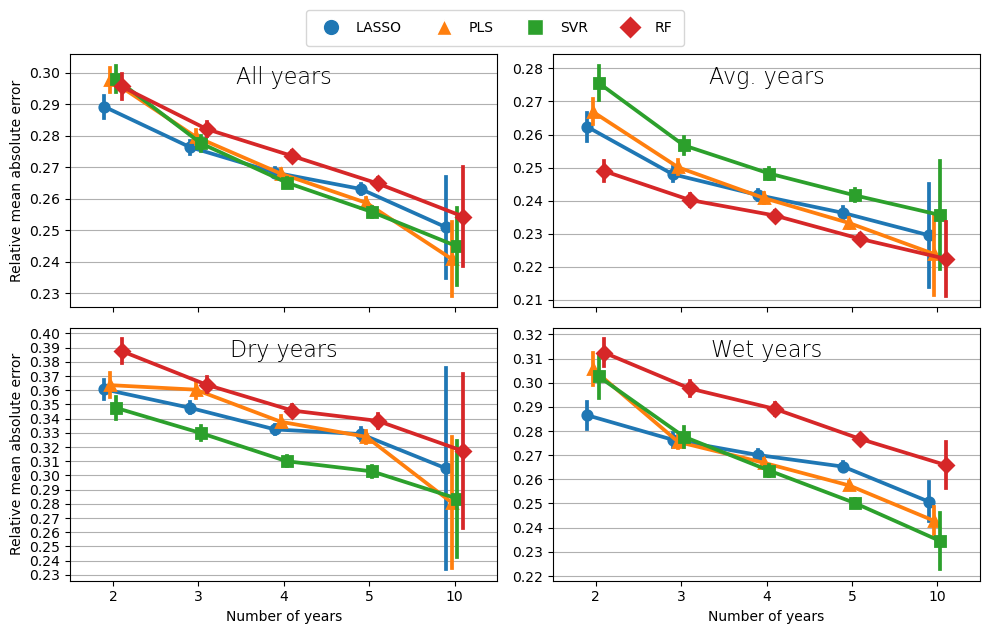

In [36]:
marker_list = ["o", "^", "s", "D"]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,6), sharey=False, sharex=True)
sns.pointplot(x='numb_yrs', y='MAE_pct_plot',
              data=df_boots_yr_transect[df_boots_yr_transect['Model'].isin(sub_models)],
              hue='Model', 
              errorbar=('se', 1),
              ax=axs[0,0], legend=False, markers=marker_list, dodge=0.2)
sns.pointplot(x='numb_yrs', y='MAE_pct_plot',
              data=df_boots_avg[df_boots_avg['Model'].isin(sub_models)],
              hue='Model', 
              errorbar=('se', 1),
              ax=axs[0,1], legend=False, markers=marker_list, dodge=0.2)
sns.pointplot(x='numb_yrs', y='MAE_pct_plot',
              data=df_boots_drought[df_boots_drought['Model'].isin(sub_models)],
              hue='Model', 
              errorbar=('se', 1),
              ax=axs[1,0], legend=False, markers=marker_list, dodge=0.2)
sns.pointplot(x='numb_yrs', y='MAE_pct_plot', 
              data=df_boots_wet[df_boots_wet['Model'].isin(sub_models)],
              hue='Model', 
              errorbar=('se', 1),
              ax=axs[1,1], legend=False, markers=marker_list, dodge=0.2)

axs[0,0].set_title('All years', y=0.85)
axs[0,1].set_title('Avg. years', y=0.85)
axs[1,0].set_title('Dry years', y=0.85)
axs[1,1].set_title('Wet years', y=0.85)

axs[0,0].set_ylabel('Relative mean absolute error')
axs[1,0].set_ylabel('Relative mean absolute error')
axs[0,1].set_ylabel('')
axs[1,1].set_ylabel('')
for ax in axs.flatten():
    ax.title.set(fontweight=10, fontsize=16)
    ax.yaxis.set_major_locator(MultipleLocator(0.01))
    ax.yaxis.grid()
for ax in axs[1,:].flatten():
    ax.set_xlabel('Number of years')
legend_elements = []
for m_idx, m in enumerate(marker_list):
    legend_elements.append(Line2D([0], [0], marker=m, color='w', 
                                  label=sub_models[m_idx],
                                  markerfacecolor=sns.color_palette("tab10")[m_idx],
                                  markersize=12))
fig.legend(handles=legend_elements,
           loc='upper center', ncols=len(marker_list),
           bbox_to_anchor=(0.5, 1.06), borderpad=0.8)
fig.tight_layout()

In [ ]:
#DISCREPENCY BETWEEN 9 AND 10 YEARS IS BECAUSE '10' YEARS (FROM ORIGINAL TRAINING) IS BASED ON THE TRANSFORMED DATA...DON'T HAVE THIS YET FOR BOOTSTRAPPED.

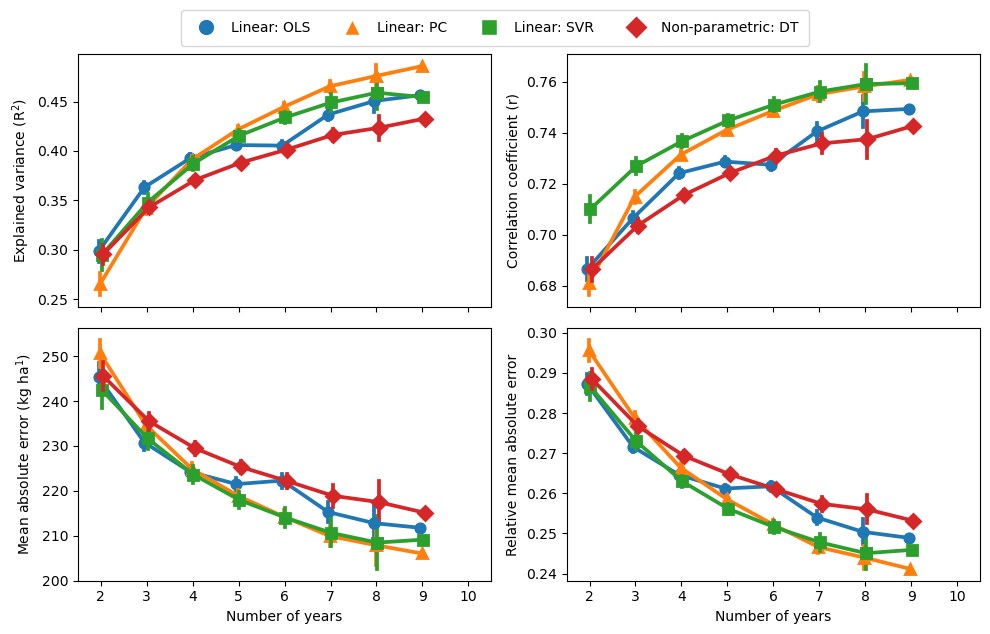

In [242]:
marker_list = ["o", "^", "s", "D"]

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,6), sharex=True)
sns.pointplot(x='numb_yrs', y='R2_plot',
              data=df_boots_yr_transect[df_boots_yr_transect['numb_yrs'] < 9],
              hue='Source_type', 
              errorbar=('se', 1),
              ax=axs[0,0], legend=False, markers=marker_list, dodge=True)
sns.pointplot(x='numb_yrs', y='R2_plot',
              data=df_boots_yr_transect[df_boots_yr_transect['numb_yrs'] >= 8],
              hue='Source_type', 
              errorbar=None,
              ax=axs[0,0], legend=False, markers=marker_list, dodge=True)
sns.pointplot(x='numb_yrs', y='r_coef_plot',
              data=df_boots_yr_transect[df_boots_yr_transect['numb_yrs'] < 9],
              hue='Source_type', 
              errorbar=('se', 1),
              ax=axs[0,1], legend=False, markers=marker_list, dodge=True)
sns.pointplot(x='numb_yrs', y='r_coef_plot',
              data=df_boots_yr_transect[df_boots_yr_transect['numb_yrs'] >= 8],
              hue='Source_type', 
              errorbar=None,
              ax=axs[0,1], legend=False, markers=marker_list, dodge=True)
sns.pointplot(x='numb_yrs', y='MAE_plot', 
              data=df_boots_yr_transect[df_boots_yr_transect['numb_yrs'] < 9],
              hue='Source_type', 
              errorbar=('se', 1),
              ax=axs[1,0], legend=False, markers=marker_list, dodge=True)
sns.pointplot(x='numb_yrs', y='MAE_plot', 
              data=df_boots_yr_transect[df_boots_yr_transect['numb_yrs'] >= 8],
              hue='Source_type', 
              errorbar=None,
              ax=axs[1,0], legend=False, markers=marker_list, dodge=True)
sns.pointplot(x='numb_yrs', y='MAE_pct_plot',
              data=df_boots_yr_transect[df_boots_yr_transect['numb_yrs'] < 9],
              hue='Source_type', 
              errorbar=('se', 1),
              ax=axs[1,1], legend=False, markers=marker_list, dodge=True)
sns.pointplot(x='numb_yrs', y='MAE_pct_plot',
              data=df_boots_yr_transect[df_boots_yr_transect['numb_yrs'] >= 8],
              hue='Source_type', 
              errorbar=None,
              ax=axs[1,1], legend=False, markers=marker_list, dodge=True)
axs[0,0].set_ylabel('Explained variance (R$^2$)')
axs[0,1].set_ylabel('Correlation coefficient (r)')
axs[1,0].set_ylabel('Mean absolute error (kg ha$^1$)')
axs[1,1].set_ylabel('Relative mean absolute error')
for ax in axs[1,:].flatten():
    ax.set_xlabel('Number of years')
legend_elements = []
for m_idx, m in enumerate(marker_list):
    legend_elements.append(Line2D([0], [0], marker=m, color='w', 
                                  label=t_all['Source_type'].unique()[m_idx],
                                  markerfacecolor=sns.color_palette("tab10")[m_idx],
                                  markersize=12))
fig.legend(handles=legend_elements,
           loc='upper center', ncols=len(marker_list),
           bbox_to_anchor=(0.5, 1.06), borderpad=0.8)
plt.tight_layout()

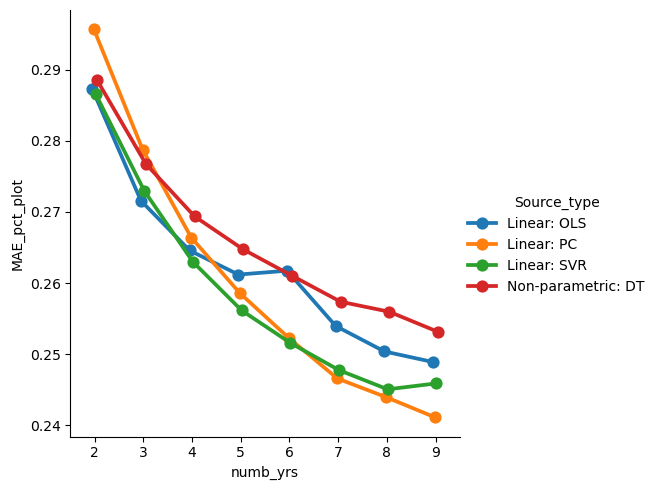

In [164]:
g = sns.catplot(kind='point', x='numb_yrs', y='MAE_pct_plot', hue='Source_type',
                dodge=True, #estimator=lambda x: np.percentile(x, 90),#showfliers=False, #cut=0, inner=None,
                errorbar=None,
                data=df_boots_yr_transect)
#g.set(ylim=(0, 0.6))

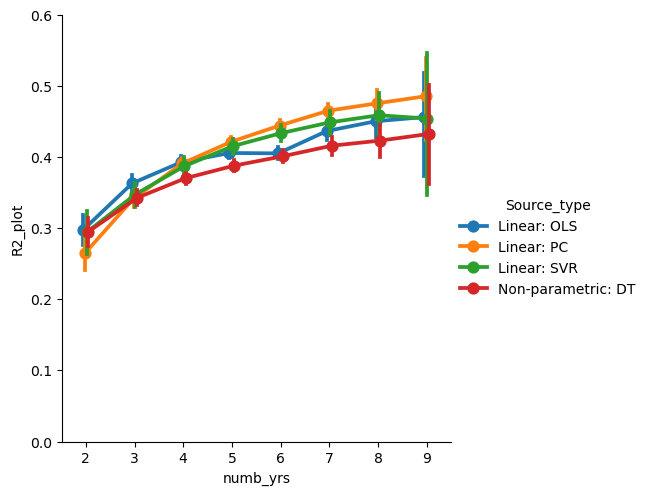

In [27]:
g = sns.catplot(kind='point', x='numb_yrs', y='R2_plot', hue='Source_type',
                dodge=True,
                data=df_boots_yr_transect,
               errorbar=('ci', 95))
g.set(ylim=(0, 0.6))

In [27]:
#df_boots_yr_transect[(df_boots_yr_transect['numb_yrs'] == 6) &
#(df_boots_yr_transect['Source_type'] == 'Linear: OLS')].sort_values('R2_plot').head(20)

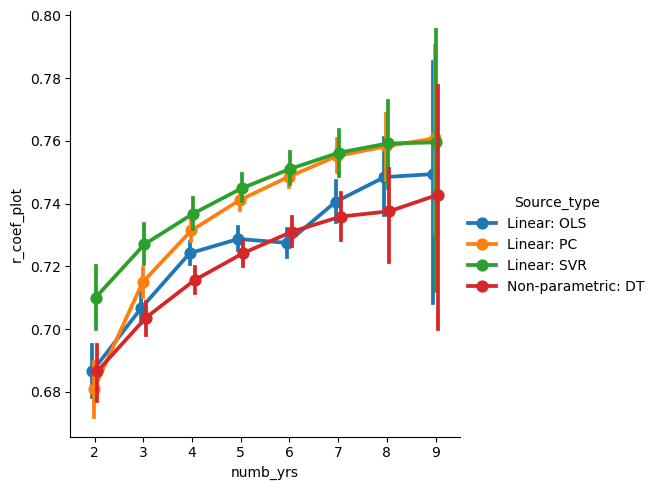

In [28]:
g = sns.catplot(kind='point', x='numb_yrs', y='r_coef_plot', hue='Source_type',
                dodge=True,
                data=df_boots_yr_transect,
               errorbar=('ci', 95))
#g.set(ylim=(0, 0.6))

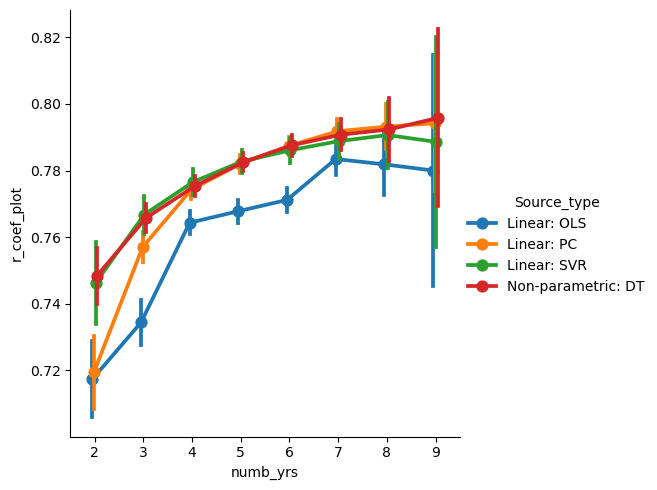

In [34]:
g = sns.catplot(kind='point', x='numb_yrs', y='r_coef_plot', hue='Source_type', 
                dodge=True,
                data=df_boots_avg,
               errorbar=('se', 2))
#g.set(ylim=(0, 0.6))

In [29]:
#df_boots_drought[df_boots_drought['numb_yrs'] == 3].sort_values('R2_plot').head(30)

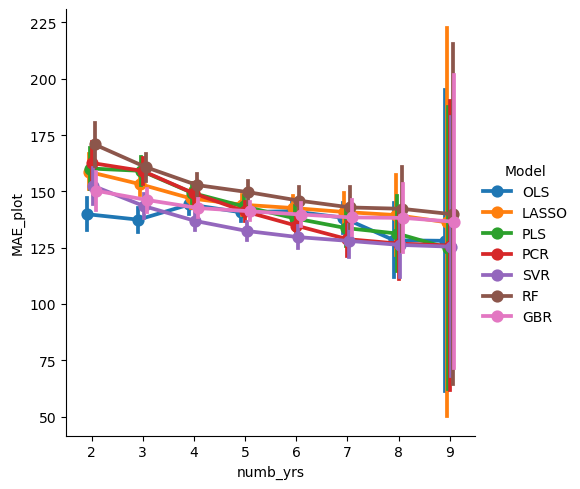

In [180]:
g = sns.catplot(kind='point', x='numb_yrs', y='MAE_plot', hue='Model', 
                dodge=True, 
                data=df_boots_drought, errorbar=('se', 2))
#g.set(ylim=(0, 0.6))

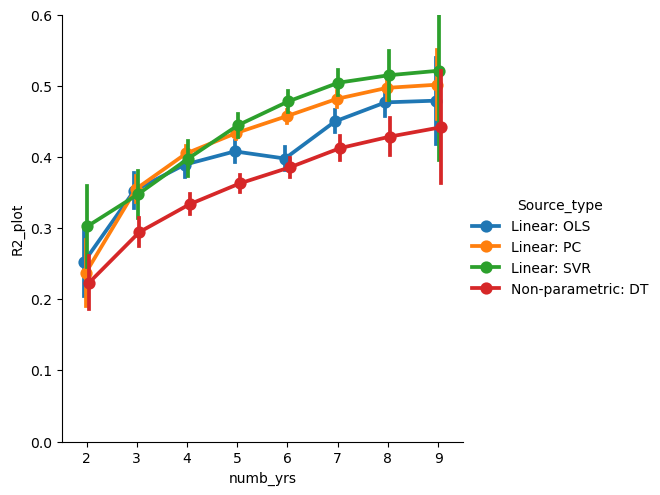

In [31]:
g = sns.catplot(kind='point', x='numb_yrs', y='R2_plot', hue='Source_type', 
                dodge=True,
                data=df_boots_wet,
               errorbar=('se', 2))
g.set(ylim=(0, 0.6))

## Variation in predictions from bootstraps

In [8]:
from matplotlib.colors import to_rgba

In [21]:
df_boots_nyrs = pd.read_csv('./results/tmp/vor_bootstrap_pred_5yrs_10iters_transect.csv')

In [22]:
df_train = pd.read_csv('../data/training/vor_2014_2023_cln_2024_04_04_transect_hls_idxs.csv')

In [23]:
import itertools
list(itertools.combinations(df_train['Year'].unique(), 9))

[(2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022),
 (2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2023),
 (2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022, 2023),
 (2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023),
 (2014, 2015, 2016, 2017, 2018, 2020, 2021, 2022, 2023),
 (2014, 2015, 2016, 2017, 2019, 2020, 2021, 2022, 2023),
 (2014, 2015, 2016, 2018, 2019, 2020, 2021, 2022, 2023),
 (2014, 2015, 2017, 2018, 2019, 2020, 2021, 2022, 2023),
 (2014, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023),
 (2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023)]

In [24]:
df_boots_nyrs_past = df_boots_nyrs.groupby(
    ['Model', 'Pasture', 'yr_test', 'yr_train', 'Season']).agg({'predicted': 'mean',
                                                    'Biomass_kg_ha': 'mean'}).reset_index()

In [25]:
df_boots_nyrs_past[(df_boots_nyrs_past['Model'] == 'SVR') &
(df_boots_nyrs_past['Pasture'] == '10S') & (df_boots_nyrs_past['yr_test'] == 2014)].yr_train.unique()

array(['2015,2016,2017,2020', '2015,2016,2017,2023',
       '2015,2016,2018,2019', '2015,2016,2018,2022',
       '2015,2016,2020,2021', '2015,2016,2020,2022',
       '2015,2017,2018,2020', '2015,2017,2019,2020',
       '2015,2017,2020,2022', '2015,2017,2021,2022',
       '2015,2018,2019,2022', '2015,2019,2021,2022',
       '2015,2020,2021,2023', '2015,2021,2022,2023',
       '2016,2017,2018,2023', '2016,2017,2019,2020',
       '2016,2017,2019,2022', '2016,2017,2020,2021',
       '2016,2019,2022,2023', '2016,2020,2022,2023',
       '2017,2019,2020,2021', '2017,2019,2020,2022',
       '2017,2020,2021,2023', '2017,2021,2022,2023',
       '2018,2019,2021,2022', '2018,2021,2022,2023',
       '2019,2020,2021,2023', '2020,2021,2022,2023'], dtype=object)

In [26]:
with pd.option_context('display.max_rows', 100):
    #display(df_boots_nyrs[(df_boots_nyrs['Model'] == 'OLS') & 
    #        (df_boots_nyrs['yr_test'] == 2020) & (df_boots_nyrs['Pasture'] == 'CN')])
    #display(df_boots_nyrs.groupby('Model').value_counts(['yr_test']))
    display(df_boots_nyrs_past.groupby(['Pasture']).value_counts(['yr_test']).head(50))

Pasture  yr_test
10S      2017       480
         2014       448
         2015       432
         2016       432
         2018       359
         2019       304
         2020       196
         2021       160
         2022        42
15E      2017       480
         2014       448
         2015       432
         2016       432
         2018       359
         2019       304
         2020       196
         2021       160
         2022        42
17N      2017       480
         2014       448
         2015       432
         2016       432
         2018       360
         2019       304
         2020       196
         2021       160
         2022        42
17S      2017       480
         2014       448
         2015       432
         2016       432
         2018       360
         2019       304
         2020       196
         2021       160
         2022        42
18S      2017       480
         2014       448
         2015       432
         2016       432
         2018       360

In [27]:
#df_boots_nyrs[df_boots_nyrs['Model'] == 'OLS'].iloc[:50]

In [28]:
"""cols_replace = ['Biomass_kg_ha', 'Id', 'Pasture', 'Date_mean', 'Year', 'Season']
for mod in df_boots_nyrs['Model'].unique():
    if mod == 'OLS':
        continue
    else:
        nrows = len(df_boots_nyrs[df_boots_nyrs['Model'] == mod])
        df_ols_sub = df_boots_nyrs[df_boots_nyrs['Model'] == 'OLS'].iloc[:nrows].copy()
        for c in cols_replace:
            df_boots_nyrs.loc[df_boots_nyrs['Model'] == mod, c] = df_ols_sub[c].values"""

"cols_replace = ['Biomass_kg_ha', 'Id', 'Pasture', 'Date_mean', 'Year', 'Season']\nfor mod in df_boots_nyrs['Model'].unique():\n    if mod == 'OLS':\n        continue\n    else:\n        nrows = len(df_boots_nyrs[df_boots_nyrs['Model'] == mod])\n        df_ols_sub = df_boots_nyrs[df_boots_nyrs['Model'] == 'OLS'].iloc[:nrows].copy()\n        for c in cols_replace:\n            df_boots_nyrs.loc[df_boots_nyrs['Model'] == mod, c] = df_ols_sub[c].values"

In [29]:
df_boots_nyrs_past = df_boots_nyrs.groupby(
    ['Model', 'Pasture', 'yr_train', 'yr_test', 'Season']).agg({'predicted': 'mean',
                                                                'Biomass_kg_ha': 'mean'}).reset_index()

In [30]:
df_boots_nyrs_past['yr_test'] = pd.Categorical(df_boots_nyrs_past['yr_test'],
                                               categories=df_boots_nyrs_past['yr_test'].sort_values(ascending=True).unique(),
                                               ordered=True)
df_boots_nyrs_past = df_boots_nyrs_past[df_boots_nyrs_past['Model'].isin(['OLS', 'PLS', 'SVR', 'RF'])].copy()
df_boots_nyrs_past['Model'] = pd.Categorical(df_boots_nyrs_past['Model'],
                                               categories=['OLS', 'PLS', 'SVR', 'RF'],
                                               ordered=True)

<Axes: xlabel='yr_test', ylabel='predicted'>

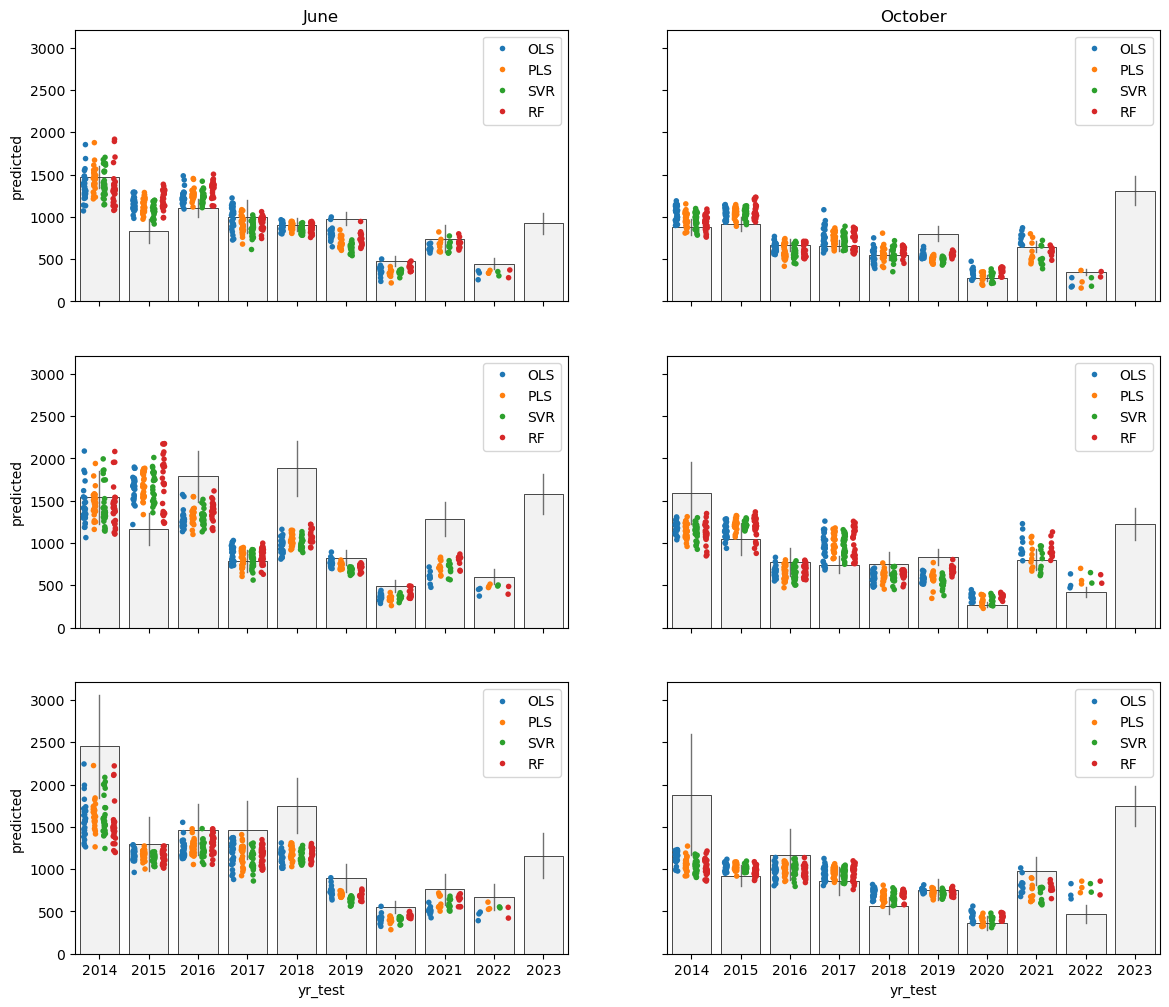

In [31]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), sharex=True, sharey=True)

pasture='15E'
season = 'June'
sns.stripplot(y='predicted', x='yr_test', hue='Model', dodge=True, jitter=True, s=4,
              ax=axs[0, 0],
            data=df_boots_nyrs_past[(df_boots_nyrs_past['Season'] == season) &
            (df_boots_nyrs_past['Pasture'] == pasture)])
sns.barplot(y='Biomass_kg_ha', x='Year',
            data=df_train[(df_train['Pasture'] == pasture) & (df_train['Season'] == season)],
            ax=axs[0, 0],
            facecolor=to_rgba('black', 0.05), edgecolor='black', linewidth=0.5,
            errorbar=('se', 2),
            err_kws={'alpha': 0.75, 'linewidth':1})
axs[0, 0].set_title('June')

pasture='15E'
season = 'October'
sns.stripplot(y='predicted', x='yr_test', hue='Model', dodge=True, jitter=True, s=4,
              ax=axs[0, 1],
            data=df_boots_nyrs_past[(df_boots_nyrs_past['Season'] == season) &
            (df_boots_nyrs_past['Pasture'] == pasture)])
sns.barplot(y='Biomass_kg_ha', x='Year',
            data=df_train[(df_train['Pasture'] == pasture) & (df_train['Season'] == season)],
            ax=axs[0, 1],
            facecolor=to_rgba('black', 0.05), edgecolor='black', linewidth=0.5,
            errorbar=('se', 2),
            err_kws={'alpha': 0.75, 'linewidth':1})
axs[0, 1].set_title('October')

pasture='19N'
season = 'June'
sns.stripplot(y='predicted', x='yr_test', hue='Model', dodge=True, jitter=True, s=4,
              ax=axs[1, 0],
            data=df_boots_nyrs_past[(df_boots_nyrs_past['Season'] == season) &
            (df_boots_nyrs_past['Pasture'] == pasture)])
sns.barplot(y='Biomass_kg_ha', x='Year',
            data=df_train[(df_train['Pasture'] == pasture) & (df_train['Season'] == season)],
            ax=axs[1, 0],
            facecolor=to_rgba('black', 0.05), edgecolor='black', linewidth=0.5,
            errorbar=('se', 2),
            err_kws={'alpha': 0.75, 'linewidth':1})

season = 'October'
sns.stripplot(y='predicted', x='yr_test', hue='Model', dodge=True, jitter=True, s=4,
              ax=axs[1, 1],
            data=df_boots_nyrs_past[(df_boots_nyrs_past['Season'] == season) &
            (df_boots_nyrs_past['Pasture'] == pasture)])
sns.barplot(y='Biomass_kg_ha', x='Year',
            data=df_train[(df_train['Pasture'] == pasture) & (df_train['Season'] == season)],
            ax=axs[1, 1],
            facecolor=to_rgba('black', 0.05), edgecolor='black', linewidth=0.5,
            errorbar=('se', 2),
            err_kws={'alpha': 0.75, 'linewidth':1})

pasture='17S'
season = 'June'
sns.stripplot(y='predicted', x='yr_test', hue='Model', dodge=True, jitter=True, s=4,
              ax=axs[2, 0],
            data=df_boots_nyrs_past[(df_boots_nyrs_past['Season'] == season) &
            (df_boots_nyrs_past['Pasture'] == pasture)])
sns.barplot(y='Biomass_kg_ha', x='Year',
            data=df_train[(df_train['Pasture'] == pasture) & (df_train['Season'] == season)],
            ax=axs[2, 0],
            facecolor=to_rgba('black', 0.05), edgecolor='black', linewidth=0.5,
            errorbar=('se', 2),
            err_kws={'alpha': 0.75, 'linewidth':1})

season = 'October'
sns.stripplot(y='predicted', x='yr_test', hue='Model', dodge=True, jitter=True, s=4,
              ax=axs[2, 1],
            data=df_boots_nyrs_past[(df_boots_nyrs_past['Season'] == season) &
            (df_boots_nyrs_past['Pasture'] == pasture)])
sns.barplot(y='Biomass_kg_ha', x='Year',
            data=df_train[(df_train['Pasture'] == pasture) & (df_train['Season'] == season)],
            ax=axs[2, 1],
            facecolor=to_rgba('black', 0.05), edgecolor='black', linewidth=0.5,
            errorbar=('se', 2),
            err_kws={'alpha': 0.75, 'linewidth':1})

<Axes: xlabel='yr_test', ylabel='predicted'>

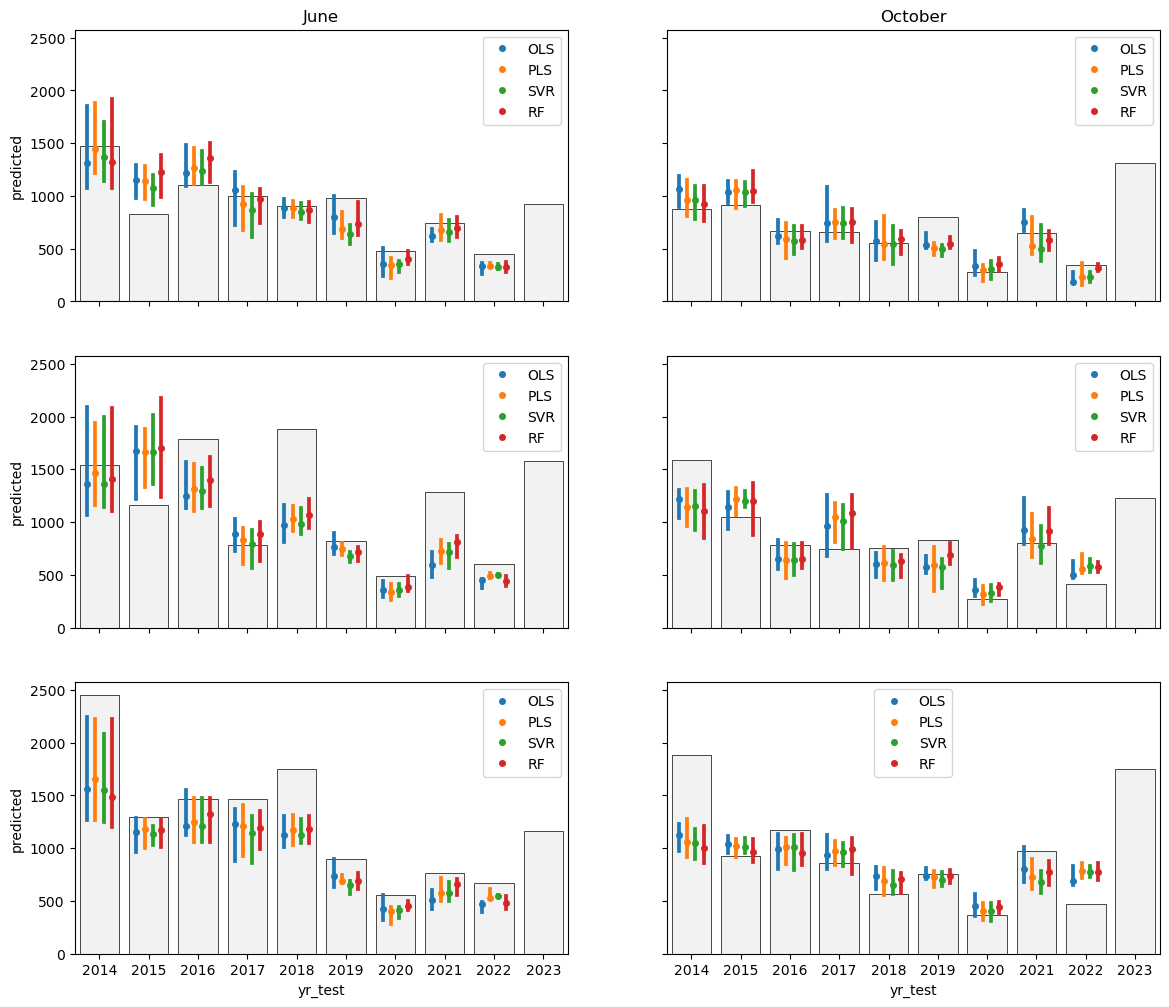

In [32]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), sharex=True, sharey=True)

pasture='15E'
season = 'June'
sns.pointplot(y='predicted', x='yr_test', hue='Model', dodge=0.5, linestyle="none", markersize=3, estimator='median', errorbar=lambda x: (min(x), max(x)),
              ax=axs[0, 0],
            data=df_boots_nyrs_past[(df_boots_nyrs_past['Season'] == season) &
            (df_boots_nyrs_past['Pasture'] == pasture)])
sns.barplot(y='Biomass_kg_ha', x='Year',
            data=df_train[(df_train['Pasture'] == pasture) & (df_train['Season'] == season)],
            ax=axs[0, 0],
            facecolor=to_rgba('black', 0.05), edgecolor='black', linewidth=0.5,
            errorbar=None,
            err_kws={'alpha': 0.75, 'linewidth':1})
axs[0, 0].set_title('June')

pasture='15E'
season = 'October'
sns.pointplot(y='predicted', x='yr_test', hue='Model', dodge=0.5, linestyle="none", markersize=3, estimator='median', errorbar=lambda x: (min(x), max(x)),
              ax=axs[0, 1],
            data=df_boots_nyrs_past[(df_boots_nyrs_past['Season'] == season) &
            (df_boots_nyrs_past['Pasture'] == pasture)])
sns.barplot(y='Biomass_kg_ha', x='Year',
            data=df_train[(df_train['Pasture'] == pasture) & (df_train['Season'] == season)],
            ax=axs[0, 1],
            facecolor=to_rgba('black', 0.05), edgecolor='black', linewidth=0.5,
            errorbar=None,
            err_kws={'alpha': 0.75, 'linewidth':1})
axs[0, 1].set_title('October')

pasture='19N'
season = 'June'
sns.pointplot(y='predicted', x='yr_test', hue='Model', dodge=0.5, linestyle="none", markersize=3, estimator='median', errorbar=lambda x: (min(x), max(x)),
              ax=axs[1, 0],
            data=df_boots_nyrs_past[(df_boots_nyrs_past['Season'] == season) &
            (df_boots_nyrs_past['Pasture'] == pasture)])
sns.barplot(y='Biomass_kg_ha', x='Year',
            data=df_train[(df_train['Pasture'] == pasture) & (df_train['Season'] == season)],
            ax=axs[1, 0],
            facecolor=to_rgba('black', 0.05), edgecolor='black', linewidth=0.5,
            errorbar=None,
            err_kws={'alpha': 0.75, 'linewidth':1})

season = 'October'
sns.pointplot(y='predicted', x='yr_test', hue='Model', dodge=0.5, linestyle="none", markersize=3, estimator='median', errorbar=lambda x: (min(x), max(x)),
              ax=axs[1, 1],
            data=df_boots_nyrs_past[(df_boots_nyrs_past['Season'] == season) &
            (df_boots_nyrs_past['Pasture'] == pasture)])
sns.barplot(y='Biomass_kg_ha', x='Year',
            data=df_train[(df_train['Pasture'] == pasture) & (df_train['Season'] == season)],
            ax=axs[1, 1],
            facecolor=to_rgba('black', 0.05), edgecolor='black', linewidth=0.5,
            errorbar=None,
            err_kws={'alpha': 0.75, 'linewidth':1})

pasture='17S'
season = 'June'
sns.pointplot(y='predicted', x='yr_test', hue='Model', dodge=0.5, linestyle="none", markersize=3, estimator='median', errorbar=lambda x: (min(x), max(x)),
              ax=axs[2, 0],
            data=df_boots_nyrs_past[(df_boots_nyrs_past['Season'] == season) &
            (df_boots_nyrs_past['Pasture'] == pasture)])
sns.barplot(y='Biomass_kg_ha', x='Year',
            data=df_train[(df_train['Pasture'] == pasture) & (df_train['Season'] == season)],
            ax=axs[2, 0],
            facecolor=to_rgba('black', 0.05), edgecolor='black', linewidth=0.5,
            errorbar=None,
            err_kws={'alpha': 0.75, 'linewidth':1})

season = 'October'
sns.pointplot(y='predicted', x='yr_test', hue='Model', dodge=0.5, linestyle="none", markersize=3, estimator='median', errorbar=lambda x: (min(x), max(x)),
              ax=axs[2, 1],
            data=df_boots_nyrs_past[(df_boots_nyrs_past['Season'] == season) &
            (df_boots_nyrs_past['Pasture'] == pasture)])
sns.barplot(y='Biomass_kg_ha', x='Year',
            data=df_train[(df_train['Pasture'] == pasture) & (df_train['Season'] == season)],
            ax=axs[2, 1],
            facecolor=to_rgba('black', 0.05), edgecolor='black', linewidth=0.5,
            errorbar=None,
            err_kws={'alpha': 0.75, 'linewidth':1})

## Euclidean distance of bootstraps

In [15]:
from tqdm import tqdm, notebook
import dask
from scipy.stats import hmean

In [16]:
df_boots_yr_transect = pd.read_csv('./results/tmp/vor_bootstrap_by_year_transect_v2.csv')
df_boots_yr_transect = df_boots_yr_transect[df_boots_yr_transect['Model'].isin(['OLS', 'LASSO', 'PLS', 'PCR', 'SVR', 'RF', 'HGBR'])].copy()
df_boots_yr_transect['Source_type'] = df_boots_yr_transect['Model'].apply(lambda x: mod_name_dict[x])

In [175]:
#client.cluster.close()
#client.close()

In [176]:
import sys
sys.path.insert(1, '/project/cper_neon_aop/hls_nrt/extract')
from hpc_setup import launch_dask
import psutil
interface_prefs = [
        'ibp175s0',
        'ibp59s0',
        'enp24s0f0',
        'ens7f0',
        'ibp24s0',
        'ib0'
    ]
interface = [x for x in interface_prefs if x in list(psutil.net_if_addrs().keys())][0]
if len(interface) == 0:
    print('ERROR: Preferred interfaces not found on node!')
else:
    print(interface)
num_jobs=128
client = launch_dask(cluster_loc='hpc',
                     num_jobs=num_jobs,
                     num_processes=2,
                     num_threads_per_processes=2,
                     mem_gb_per=12.0,
                     partition='atlas', 
                     duration='2:00:00',
                     slurm_opts={'interface': interface},
                     extra_directives=["--account=cper_neon_aop"],
                     wait_proportion=0.25,
                    wait_timeout=240,
                    debug=False)
display(client)

ib0
   setting up cluster on HPC...


<Client: 'tcp://172.21.15.2:43853' processes=0 threads=0, memory=0 B>

In [18]:
#from distributed import get_client
#client = get_client()
#nthreads = len(client.nthreads())
#display(client)

In [19]:
df_year['sqrt_Biomass_kg_ha'] = np.sqrt(df_year['Biomass_kg_ha']) 
var_names = ['NDVI', 'DFI', 'NDTI', 'SATVI', 'NDII7',
       'SAVI', 'RDVI', 'MTVI1', 'NCI', 'NDCI', 'PSRI', 'NDWI', 'EVI', 'TCBI',
       'TCGI', 'TCWI', 'BAI_126', 'BAI_136', 'BAI_146', 'BAI_236', 'BAI_246',
       'BAI_346', 'BLUE', 'GREEN', 'RED', 'NIR1', 'SWIR1', 'SWIR2']

In [47]:
df_plot['cv'].unique().item()

'Plot'

In [198]:
@dask.delayed
def pls_dist(i, df_cv, x_vars=var_names,
             y_var='sqrt_Biomass_kg_ha',
             centroids_only=True):
    dfs_out = []
    idxs_out = []
    X = df_cv[df_cv['kfold'] != i][x_vars]
    y = df_cv[df_cv['kfold'] != i][y_var]
    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    
    pc = PLSRegression(n_components=12)
    pc.fit(X_scaled, y)

    df_tmp = df_cv
    scores = pc.transform(scaler.transform(df_tmp[var_names]))

    pc_names = []
    naY = y
    r2_scores = []
    
    for j in range(scores.shape[1]):
        pc_names.append('PC' + str(j+1)) 
        df_tmp['PC'+str(j+1)] = scores[:,j]
        Y_pred=np.dot(pc.x_scores_[:,j].reshape(-1,1), pc.y_loadings_[:,j].reshape(-1,1).T)*naY.std(axis=0, ddof=1)+naY.mean(axis=0)
        r2_scores.append(round(r2_score(y, Y_pred),3))

    df_k_sub = df_tmp[df_tmp['kfold'] == i]
    df_k_centroids = df_k_sub[df_k_sub['kfold'] == i][pc_names].mean(axis=0)
    df_other_centroids_kfolds = df_tmp[df_tmp['kfold'] != i].groupby('Year')[pc_names].mean()
    ed_kfolds = np.sqrt(np.sum(r2_scores*(df_k_centroids - df_other_centroids_kfolds)**2, axis=1))
    df_other_centroids_all = df_tmp[df_tmp['kfold'] != i][pc_names].mean()
    ed_all = np.sqrt(np.sum(r2_scores*(df_k_centroids - df_other_centroids_all)**2))
    if centroids_only:
        dfs_out.append({'kfold': i,
                        'cv': df_tmp['cv'].unique().item(),
                        'distances_centroid_all_mean': np.mean(ed_all),
                        'distances_centroid_yrs_mean': np.mean(ed_kfolds),
                        'distances_centroid_yrs_min': np.min(ed_kfolds),
                        'distances_centroid_all_hmean': hmean(ed_all+1e-10),
                        'distances_centroid_kfolds_hmean': hmean(ed_kfolds+1e-10)})
    else:
        distances_mean = []
        distances_hmean = []
        distances_mean_within = []
        distances_hmean_within = []
        for row_idx, row in df_k_sub.iterrows():
            point = row[pc_names].values.astype(float)
            other_points = df_tmp[df_tmp['kfold'] != i][pc_names].values.astype(float)
            within_points = df_tmp[(df_tmp.index != row_idx) & (df_tmp['kfold'] == i)][pc_names].values.astype(float)
            ec_wdistances = np.sqrt(np.sum(r2_scores*(other_points - point) ** 2, axis=1))
            ec_wdistances_within = np.sqrt(np.sum(r2_scores*(within_points - point) ** 2, axis=1))
            distances_mean.append(np.mean(ec_wdistances))
            distances_hmean.append(hmean(ec_wdistances+1e-10))
            distances_mean_within.append(np.mean(ec_wdistances_within))
            distances_hmean_within.append(hmean(ec_wdistances_within+1e-10))
        dfs_out.append({'kfold': i,
                        'cv': df_tmp['cv'].unique().item(),
                        'distances_centroid_all_mean': np.mean(ed_all),
                        'distances_centroid_kfolds_mean': np.mean(ed_kfolds),
                        'distances_centroid_kfolds_min': np.min(ed_kfolds),
                        'distances_centroid_all_hmean': hmean(ed_all+1e-10),
                        'distances_centroid_kfolds_hmean': hmean(ed_kfolds+1e-10),
                        'distances_mean': np.mean(distances_mean),
                        'distances_hmean': np.mean(distances_hmean),
                       'distances_mean_within': np.mean(distances_mean_within),
                        'distances_hmean_within': np.mean(distances_hmean_within)})
    df_out = pd.DataFrame(dfs_out)
    return df_out

In [199]:
plot_results_tmp = [pls_dist(x, df_plot, centroids_only=False) for x in df_plot['kfold'].unique()]
plot_results = dask.compute(*plot_results_tmp)

In [200]:
spatial_results_tmp = [pls_dist(x, df_spatial, centroids_only=False) for x in df_spatial['kfold'].unique()]
spatial_results = dask.compute(*spatial_results_tmp)

In [201]:
ecosite_results_tmp = [pls_dist(x, df_ecosite, centroids_only=False) for x in df_ecosite['kfold'].unique()]
ecosite_results = dask.compute(*ecosite_results_tmp)

In [202]:
year_results_tmp = [pls_dist(x, df_year, centroids_only=False) for x in df_year['kfold'].unique()]
year_results = dask.compute(*year_results_tmp)

In [226]:
df_ec_dists = pd.concat([pd.concat(plot_results), 
                         pd.concat(spatial_results), 
                         pd.concat(ecosite_results), 
                         pd.concat(year_results)])

In [240]:
df_ec_dists['distances_hmean_ratio'] = df_ec_dists['distances_hmean']/df_ec_dists['distances_hmean_within']

In [227]:
df_all_k = pd.concat([pd.merge(t_plot, pd.concat(plot_results), how='left', on=['kfold', 'cv']),
                     pd.merge(t_spatial.rename(columns={'spatial': 'kfold'}), pd.concat(spatial_results), how='left', on=['kfold', 'cv']),
                     pd.merge(t_ecosite.rename(columns={'ecosite': 'kfold'}), pd.concat(ecosite_results), how='left', on=['kfold', 'cv']),
                     pd.merge(t_year, pd.concat(year_results), how='left', on=['kfold', 'cv'])])

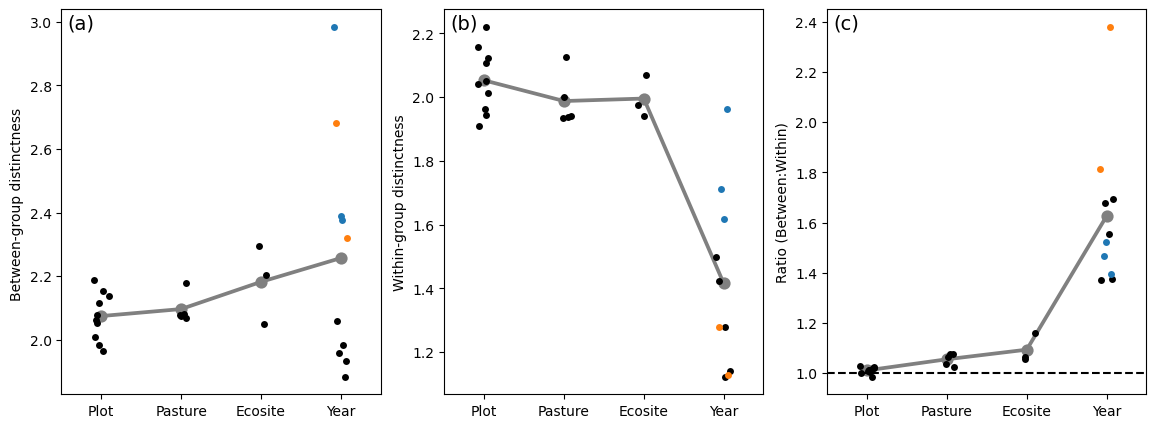

In [351]:
fig, axs = plt.subplots(ncols=3, figsize=(14, 5))

sns.stripplot(x='cv', y='distances_hmean', data=df_ec_dists[~df_ec_dists['kfold'].isin([2014, 2015, 2020, 2022, 2023])],
                  c='black', ax=axs[0])
sns.stripplot(x='cv', y='distances_hmean', data=df_ec_dists[df_ec_dists['kfold'].isin([2020, 2022])],
                  c='tab:orange', ax=axs[0])
sns.stripplot(x='cv', y='distances_hmean', data=df_ec_dists[df_ec_dists['kfold'].isin([2014, 2015, 2023])],
                  c='tab:blue', ax=axs[0])
sns.pointplot(x='cv', y='distances_hmean', data=df_ec_dists, 
              errorbar=None, c='grey', ax=axs[0])

sns.stripplot(x='cv', y='distances_hmean_within', data=df_ec_dists[~df_ec_dists['kfold'].isin([2014, 2015, 2020, 2022, 2023])],
                  c='black', ax=axs[1])
sns.stripplot(x='cv', y='distances_hmean_within', data=df_ec_dists[df_ec_dists['kfold'].isin([2020, 2022])],
                  c='tab:orange', ax=axs[1])
sns.stripplot(x='cv', y='distances_hmean_within', data=df_ec_dists[df_ec_dists['kfold'].isin([2014, 2015, 2023])],
                  c='tab:blue', ax=axs[1])
sns.pointplot(x='cv', y='distances_hmean_within', data=df_ec_dists, 
              errorbar=None,  c='grey', ax=axs[1])

sns.stripplot(x='cv', y='distances_hmean_ratio', data=df_ec_dists[~df_ec_dists['kfold'].isin([2014, 2015, 2020, 2022, 2023])],
                  c='black', ax=axs[2])
sns.stripplot(x='cv', y='distances_hmean_ratio', data=df_ec_dists[df_ec_dists['kfold'].isin([2020, 2022])],
                  c='tab:orange', ax=axs[2])
sns.stripplot(x='cv', y='distances_hmean_ratio', data=df_ec_dists[df_ec_dists['kfold'].isin([2014, 2015, 2023])],
                  c='tab:blue', ax=axs[2])
sns.pointplot(x='cv', y='distances_hmean_ratio', data=df_ec_dists, 
              errorbar=None, c='grey', ax=axs[2])

axs[0].set_ylabel('Between-group distinctness ')
axs[1].set_ylabel('Within-group distinctness')
axs[2].set_ylabel('Ratio (Between:Within)')

axs[2].axhline(y=1.0, linestyle='dashed', c='black')

for idx, ax in enumerate(axs):
    ax.set_xlabel('')
    ax.annotate(['(a)', '(b)', '(c)'][idx], (0.02, 0.95), xycoords='axes fraction', fontsize=14)
    ax.set_xticks([0,1,2,3])
    ax.set_xticklabels(['Plot', 'Pasture', 'Ecosite', 'Year'])

In [342]:
from scipy.stats import pearsonr, spearmanr
import numpy as np
# https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance
sub_cols = ['distances_hmean', 'distances_hmean_within', 'distances_hmean_ratio', 'R^2', 'r', 'MAE', 'MAE_pct']
rho = df_all_k[sub_cols + ['Source']].groupby('Source').corr(method='spearman')
pval = df_all_k[sub_cols + ['Source']].groupby('Source').corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(*rho.shape)
p = pval.map(lambda x: ''.join(['*' for t in [.05, .01, .001] if x<=t]))
df_cor_sig = rho.round(2).map('{:,.2f}'.format) #+ p
for c in ['R^2', 'r', 'MAE', 'MAE_pct']:
    df_cor_sig.loc[~p[c].str.contains('\*'), c] = ''
df_cor_sig = df_cor_sig.drop(
    index=['R^2', 'r', 'MAE', 'MAE_pct'], level=1).drop(
    index=['CPER_2022', 'ENS_ALL', 'ENS_LIN', 'ENS_ML', 'HGBR', 'OLS_2022', 'PCR'], level=0).drop(
    columns=['distances_hmean', 'distances_hmean_within', 'distances_hmean_ratio'])
df_cor_sig = df_cor_sig.loc[['OLS', 'LASSO', 'PLS', 'SVR', 'RF']]
df_cor_sig = df_cor_sig.rename(index={'distances_hmean': 'Between groups',
                         'distances_hmean_within': 'Within groups',
                         'distances_hmean_ratio': 'Ratio (Between:Within)'}).reset_index(names=['Model', 'Distinctness'])
df_cor_sig.to_csv('./results/tables/ml_models/corr_distinctness_vs_performance.csv')

In [352]:
display(df_cor_sig)

Model            Distinctness    R^2      r   MAE MAE_pct
0     OLS          Between groups                0.50    0.57
1     OLS           Within groups   0.49                     
2     OLS  Ratio (Between:Within)  -0.72  -0.49              
3   LASSO          Between groups                0.41    0.42
4   LASSO           Within groups   0.46   0.39              
5   LASSO  Ratio (Between:Within)  -0.70  -0.62              
6     PLS          Between groups                0.45    0.41
7     PLS           Within groups   0.41                     
8     PLS  Ratio (Between:Within)  -0.65  -0.58              
9     SVR          Between groups                            
10    SVR           Within groups   0.48                     
11    SVR  Ratio (Between:Within)  -0.70  -0.52              
12     RF          Between groups         -0.39  0.43    0.54
13     RF           Within groups   0.58   0.55              
14     RF  Ratio (Between:Within)  -0.81  -0.80  0.38    0.53

In [260]:
df_all_k['distances_hmean_ratio'] = df_all_k['distances_hmean']/df_all_k['distances_hmean_within']
df_all_k_long = pd.melt(df_all_k, id_vars=['Source', 'kfold', 'cv', 'distances_mean', 'distances_hmean', 
                                           'distances_mean_within', 'distances_hmean_within',
                                           'distances_hmean_ratio',
                                           'distances_centroid_all_hmean', 'distances_centroid_kfolds_hmean'], 
        value_vars=['MAE', 'Bias', 'MAE_bt', 'MAE_pct', 'R^2', 'r'],
        var_name='metric')

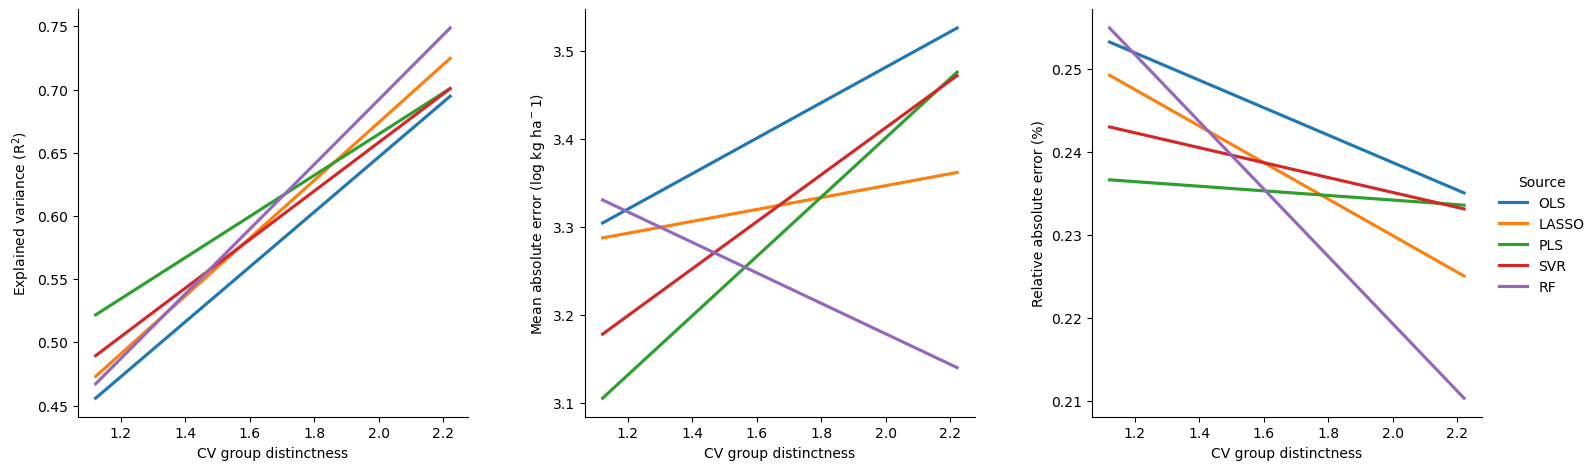

In [272]:
g = sns.lmplot(x='distances_hmean_within', y='value', hue='Source', col='metric',
               ci=None, scatter=False, 
               facet_kws=dict(sharey=False, legend_out=True),
               data=df_all_k_long[df_all_k_long['Source'].isin(['OLS', 'LASSO', 'PLS', 'SVR', 'RF']) &
               df_all_k_long['metric'].isin(['R^2', 'MAE', 'MAE_pct'])],
               col_order=['R^2', 'MAE', 'MAE_pct'])
g.axes.flatten()[0].set_ylabel('Explained variance (R$^2$)')
g.axes.flatten()[1].set_ylabel('Mean absolute error (log kg ha$^-1$)')
g.axes.flatten()[2].set_ylabel('Relative absolute error (%)')
#g.add_legend(loc='lower right')
for ax in g.axes.flatten():
    ax.set_xlabel('CV group distinctness')
    ax.set_title('')
g.fig.subplots_adjust(wspace=0.3)

In [20]:
@dask.delayed
def bootstrap_pls_dist(i, df_boot, df_hls, x_vars=var_names,
                       y_var='sqrt_Biomass_kg_ha', cv_var='Year', train_col='yr_train', test_col='yr_test',
                       centroids_only=True):
    dfs_out = []
    idxs_out = []
    yrs_train = [int(x) for x in i[1:-1].split(' ')]
    X = df_hls[df_hls[cv_var].isin(yrs_train)][x_vars]
    y = df_hls[df_hls[cv_var].isin(yrs_train)][y_var]
    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    
    pc = PLSRegression(n_components=5)
    pc.fit(X_scaled, y)
    for yr in df_boot[df_boot[train_col] == i][test_col].unique():
        df_tmp = df_hls[df_hls[cv_var].isin(yrs_train + [yr])].copy()
        scores = pc.transform(scaler.transform(df_tmp[var_names]))
    
        pc_names = []
        naY = y
        r2_scores = []
        
        for j in range(scores.shape[1]):
            pc_names.append('PC' + str(j+1)) 
            df_tmp['PC'+str(j+1)] = scores[:,j]
            Y_pred=np.dot(pc.x_scores_[:,j].reshape(-1,1), pc.y_loadings_[:,j].reshape(-1,1).T)*naY.std(axis=0, ddof=1)+naY.mean(axis=0)
            r2_scores.append(round(r2_score(y, Y_pred),3))
    
        df_year_sub = df_tmp[df_tmp[cv_var] == yr]
        df_year_centroids = df_year_sub[df_year_sub[cv_var] == yr][pc_names].mean(axis=0)
        df_other_centroids_yrs = df_tmp[df_tmp[cv_var] != yr].groupby('Year')[pc_names].mean()
        ed_yrs = np.sqrt(np.sum(r2_scores*(df_year_centroids - df_other_centroids_yrs)**2, axis=1))
        df_other_centroids_all = df_tmp[df_tmp[cv_var] != yr][pc_names].mean()
        ed_all = np.sqrt(np.sum(r2_scores*(df_year_centroids - df_other_centroids_all)**2))
        if centroids_only:
            dfs_out.append({train_col: i,
                            test_col: yr,
                            'distances_centroid_all_mean': np.mean(ed_all),
                            'distances_centroid_yrs_mean': np.mean(ed_yrs),
                            'distances_centroid_yrs_min': np.min(ed_yrs),
                            'distances_centroid_yrs_hmean': hmean(ed_yrs+1e-10)})
        else:
            distances_mean = []
            distances_median = []
            distances_q25 = []
            distances_q10 = []
            distances_q2 = []
            distances_hmean = []
            for _, row in df_year_sub.iterrows():
                point = row[pc_names].values.astype(float)
                other_points = df_tmp[df_tmp[cv_var] != yr][pc_names].values.astype(float)
                # Calculate squared distances using broadcasting
                #sum_distances = np.sum(r2_scores*np.sqrt((other_points - point) ** 2), axis=1)
                #avg_distances = np.average(np.sqrt((other_points - point) ** 2), weights=r2_scores, axis=1)
                ec_wdistances = np.sqrt(np.sum(r2_scores*(other_points - point) ** 2, axis=1))
                # Calculate distances using square root
                #distances.append(np.sqrt(squared_distances)) # originally run this way, means are the same, but q's different
                distances_mean.append(np.mean(ec_wdistances))
                distances_median.append(np.median(ec_wdistances))
                distances_q25.append(np.quantile(ec_wdistances, 0.25))
                distances_q10.append(np.quantile(ec_wdistances, 0.10))
                distances_q2.append(np.quantile(ec_wdistances, 0.02))
                distances_hmean.append(hmean(ec_wdistances+1e-10))
            dfs_out.append({train_col: i,
                            test_col: yr,
                            'distances_centroid_all_mean': np.mean(ed_all),
                            'distances_centroid_yrs_mean': np.mean(ed_yrs),
                            'distances_centroid_yrs_min': np.min(ed_yrs),
                            'distances_centroid_yrs_hmean': hmean(ed_yrs+1e-10),
                            'distances_mean': np.mean(distances_mean),
                           'distances_median': np.mean(distances_median),
                           'distances_q25': np.mean(distances_q25),
                            'distances_q10': np.mean(distances_q10),
                           'distances_q2': np.mean(distances_q2),
                           'distances_hmean': np.mean(distances_hmean)})
            #idxs_out.append(df_boot.loc[(df_boot[train_col] == i) &
            #                (df_boot[test_col] == yr)].index)
    df_out = pd.DataFrame(dfs_out)
    return df_out

In [31]:
i = df_boots_yr_transect['yr_train'].unique()[0]
df_boot = df_boots_yr_transect
df_hls = df_year
x_vars=var_names
y_var='sqrt_Biomass_kg_ha'
cv_var='Year'
train_col='yr_train'
test_col='yr_test'
yrs_train = [int(x) for x in i[1:-1].split(' ')]
X = df_hls[df_hls[cv_var].isin(yrs_train)][x_vars]
y = df_hls[df_hls[cv_var].isin(yrs_train)][y_var]
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

pc = PLSRegression(n_components=5)
pc.fit(X_scaled, y)

PLSRegression(n_components=5)

In [70]:
#df_boots_yr_transect
#df_year

In [71]:
df_boots_yr_transect['yr_test'] = df_boots_yr_transect['yr_test'].astype(int)

In [72]:
#dask.compute(bootstrap_pls_dist(i, df_boots_yr_transect, df_year, centroids_only=True))

In [73]:
#df_boots_yr_transect['yr_train'].unique()

In [74]:
yr = df_boot[df_boot[train_col] == i][test_col].unique()[0]
df_tmp = df_hls[df_hls[cv_var].isin(yrs_train + [yr])].copy()
scores = pc.transform(scaler.transform(df_tmp[var_names]))

pc_names = []
naY = y
r2_scores = []

for j in range(scores.shape[1]):
    pc_names.append('PC' + str(j+1)) 
    df_tmp['PC'+str(j+1)] = scores[:,j]
    Y_pred=np.dot(pc.x_scores_[:,j].reshape(-1,1), pc.y_loadings_[:,j].reshape(-1,1).T)*naY.std(axis=0, ddof=1)+naY.mean(axis=0)
    r2_scores.append(round(r2_score(y, Y_pred),3))

df_year_sub = df_tmp[df_tmp[cv_var] == yr]
distances_mean = []
distances_median = []
distances_q25 = []
distances_q10 = []
distances_q2 = []
for _, row in df_year_sub.iterrows():
    point = row[pc_names].values.astype(float)
    other_points = df_tmp[df_tmp[cv_var] != yr][pc_names].values.astype(float)
    # Calculate squared distances using broadcasting
    ec_distances = np.sqrt(np.sum((other_points - point) ** 2, axis=1))

In [75]:
df_boots_yr_transect['Model'].unique()

array(['OLS', 'LASSO', 'PLS', 'PCR', 'SVR', 'RF', 'HGBR'], dtype=object)

In [76]:
results_tmp = [bootstrap_pls_dist(x, df_boots_yr_transect, df_year, centroids_only=False) for x in df_boots_yr_transect['yr_train'].unique()]

In [77]:
from dask.distributed import progress
results = dask.compute(*results_tmp)
#progress(results)

/project/cper_neon_aop/conda_envs/py_ml_env/lib/python3.9/site-packages/distributed/client.py:3157: UserWarning: Sending large graph of size 10.39 MiB.
This may cause some slowdown.
Consider scattering data ahead of time and using futures.
  warnings.warn(
2024-12-13 16:33:08,393 - tornado.application - ERROR - Uncaught exception GET /individual-progress/ws (::1)
HTTPServerRequest(protocol='http', host='atlas-0018:65519', method='GET', uri='/individual-progress/ws', version='HTTP/1.1', remote_ip='::1')
Traceback (most recent call last):
  File "/project/cper_neon_aop/conda_envs/py_ml_env/lib/python3.9/site-packages/tornado/web.py", line 1790, in _execute
    result = await result
  File "/project/cper_neon_aop/conda_envs/py_ml_env/lib/python3.9/site-packages/tornado/websocket.py", line 273, in get
    await self.ws_connection.accept_connection(self)
  File "/project/cper_neon_aop/conda_envs/py_ml_env/lib/python3.9/site-packages/tornado/websocket.py", line 863, in accept_connection
    

In [458]:
#results

In [62]:
client.cluster.close()
client.close()

2024-06-28 12:40:25,802 - distributed.scheduler - ERROR - Task bootstrap_pls_dist-194a7237-08bd-4491-8682-39b722818e27 marked as failed because 4 workers died while trying to run it
2024-06-28 12:40:25,839 - distributed.scheduler - ERROR - Task bootstrap_pls_dist-b4dfd529-f380-4b11-8871-eea5433de1e6 marked as failed because 4 workers died while trying to run it


In [63]:
#from joblib import Parallel, delayed

In [64]:
#results = list(notebook.tqdm(Parallel(n_jobs=-1, return_as='generator')(delayed(bootstrap_pls_dist)(x, df_boots_yr_transect, df_year) for x in df_boots_yr_transect['yr_train'].unique()), total=len(df_boots_yr_transect['yr_train'].unique())))

In [88]:
df_boots2 = pd.merge(df_boots_yr_transect, pd.concat(results), on=['yr_train', 'yr_test'], how='left')
df_boots2['numb_yrs'] = df_boots2['numb_yrs'].astype(str)

In [96]:
#len(df_boots2)

35140

In [89]:
df_boots2.columns

Index(['Model', 'numb_yrs', 'yr_train', 'yr_test', 'retune_bootstrap', 'MAE',
       'MAPE', 'MAE_pct', 'R2', 'r_coef', 'R2_xfrm', 'r_coef_xfrm', 'MAE_plot',
       'MAPE_plot', 'MAE_pct_plot', 'R2_plot', 'r_coef_plot', 'R2_xfrm_plot',
       'r_coef_xfrm_plot', 'Source_type', 'distances_centroid_all_mean',
       'distances_centroid_yrs_mean', 'distances_centroid_yrs_min',
       'distances_centroid_yrs_hmean', 'distances_mean', 'distances_median',
       'distances_q25', 'distances_q10', 'distances_q2', 'distances_hmean'],
      dtype='object')

In [90]:
df_boots2.loc[df_boots2['R2_xfrm_plot'] < 0, 'R2_xfrm_plot'] = 0
df_boots2.loc[df_boots2['distances_hmean'] > 4.5, 'distances_hmean'] = 4.5

In [79]:
#df_boots2[df_boots2['Model'] == 'PLS'].sort_values('distances_centroid_min', ascending=False).head(50)

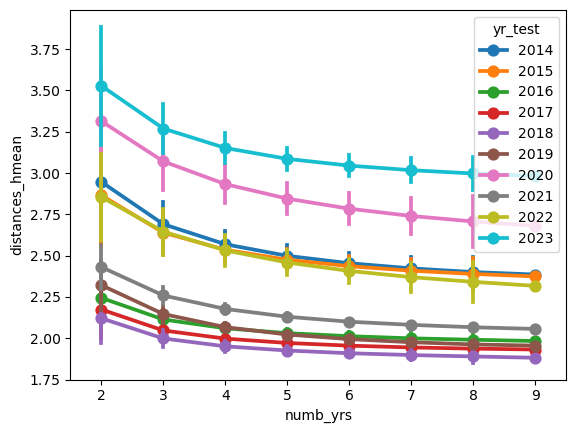

In [80]:
g = sns.pointplot(y='distances_hmean', x='numb_yrs', 
                  hue='yr_test', 
                  palette='tab10',
                  errorbar=('se', 2),
                  data=df_boots2[df_boots2['Model'] == 'PLS'])

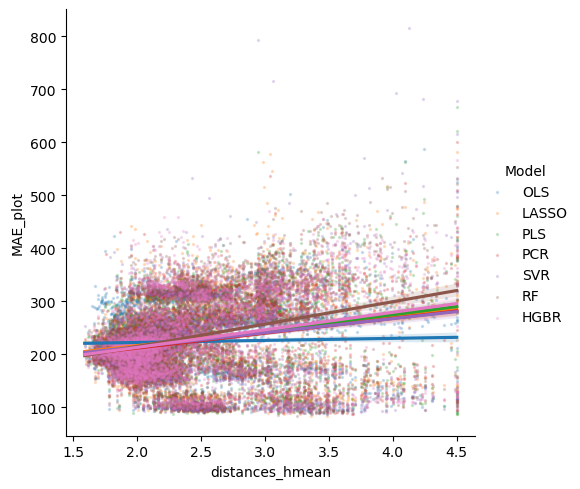

In [98]:
sns.lmplot(x='distances_hmean',
           y='MAE_plot',
           hue='Model',
           #hue='numb_yrs',
           scatter=True,
           scatter_kws=dict(alpha=0.2, s=2),
           data=df_boots2,#[df_boots2['Model'].isin(['PLS', 'RF'])],#[df_boots2['distances_q2'] < 1.5], 
           #col='numb_yrs', col_wrap=3, order=1,
           order=1,
           #ci=None,
           ci=95,#[(df_boots2['Model'] == 'RF')],
          # palette='magma'
          )

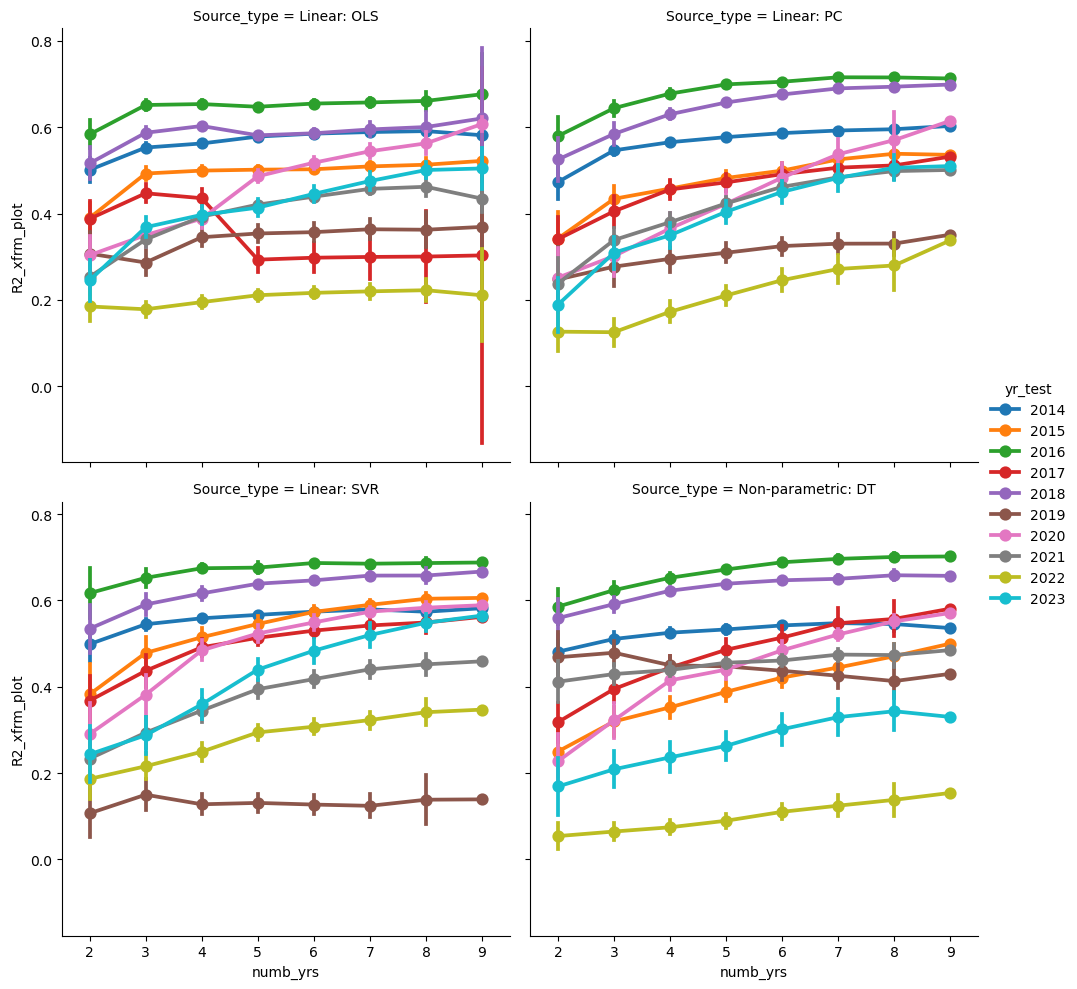

In [484]:
g = sns.catplot(kind='point', y='R2_xfrm_plot', x='numb_yrs', 
                  hue='yr_test', 
                  palette='tab10',
                  errorbar=('se', 2),
                  data=df_boots2,
                  col='Source_type', col_wrap=2)

In [508]:
qs = np.round(np.quantile(df_boots2['distances_mean'], np.arange(0, 1.2, 0.2)), 2)
df_boots2['ed_bin'] = pd.cut(df_boots2['distances_mean'],
                           bins=qs,
                           labels=['Bin ('+str(qs[i]) + ' - ' + str(qs[i+1]) + ')' for i in range(5)])

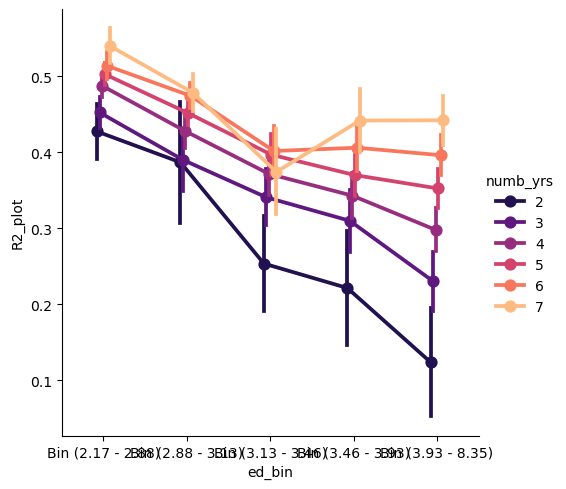

In [509]:
g = sns.catplot(kind='point', x='ed_bin', y='R2_plot', hue='numb_yrs', 
                dodge=True,
                estimator='mean',
                data=df_boots2[(df_boots2['Model'] == 'PLS') &
                (df_boots2['numb_yrs'].isin(np.arange(0, 8).astype(str)))],
                errorbar=('se', 2),
                palette='magma')

In [ ]:
for i in tqdm(df_boots_yr_transect['yr_train'].unique()):
    #print(i)
    yrs_train = [int(x) for x in i[1:-1].split(' ')]
    X = df_year[df_year['Year'].isin(yrs_train)][var_names]
    y = df_year[df_year['Year'].isin(yrs_train)]['sqrt_Biomass_kg_ha']
    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    
    pc = PLSRegression(n_components=5)
    pc.fit(X_scaled, y)
    for yr in df_boots_yr_transect[df_boots_yr_transect['yr_train'] == i]['yr_test'].unique():
        #yr = row['yr_test']
        df_tmp = df_year[df_year['Year'].isin(yrs_train + [yr])].copy()
        scores = pc.transform(scaler.transform(df_tmp[var_names]))
    
        pc_names = []
        naY = y
        r2_scores = []
        
        for j in range(scores.shape[1]):
            pc_names.append('PC' + str(j+1)) 
            df_tmp['PC'+str(j+1)] = scores[:,j]
            Y_pred=np.dot(pc.x_scores_[:,j].reshape(-1,1), pc.y_loadings_[:,j].reshape(-1,1).T)*naY.std(axis=0, ddof=1)+naY.mean(axis=0)
            r2_scores.append(round(r2_score(y, Y_pred),3))
    
        df_year_sub = df_tmp[df_tmp['Year'] == yr]
        distances = []
        for _, row in df_year_sub.iterrows():
            point = row[pc_names].values.astype(float)
            other_points = df_tmp[df_tmp['Year'] != yr][pc_names].values.astype(float)
            # Calculate squared distances using broadcasting
            squared_distances = np.sum(r2_scores*((other_points - point) ** 2), axis=1)
            # Calculate distances using square root
            #distances.append(np.sqrt(squared_distances)) # originally run this way, means are the same, but q's different
            distances.append(np.mean(np.sqrt(squared_distances)))
        df_boots_yr_transect.loc[(df_boots_yr_transect['yr_train'] == i) & 
        (df_boots_yr_transect['yr_test'] == yr), 'ed_mean2'] = np.mean(distances)
        df_boots_yr_transect.loc[(df_boots_yr_transect['yr_train'] == i) & 
        (df_boots_yr_transect['yr_test'] == yr), 'ed_median2'] = np.median(distances)
        df_boots_yr_transect.loc[(df_boots_yr_transect['yr_train'] == i) & 
        (df_boots_yr_transect['yr_test'] == yr), 'ed_q12'] = np.quantile(distances, 0.2)    

  2%|▏         | 16/1012 [03:36<3:41:52, 13.37s/it]

In [44]:
#df_boots_yr_transect.head(50)

In [512]:
df_boots_yr_transect['ed_bin'] = pd.cut(df_boots_yr_transect['ed_mean2'],
                           bins=np.quantile(df_boots_yr_transect['ed_mean2'], np.arange(0, 1.0, 0.1)),
                           labels=['Bin'+str(x+1) for x in range(9)])

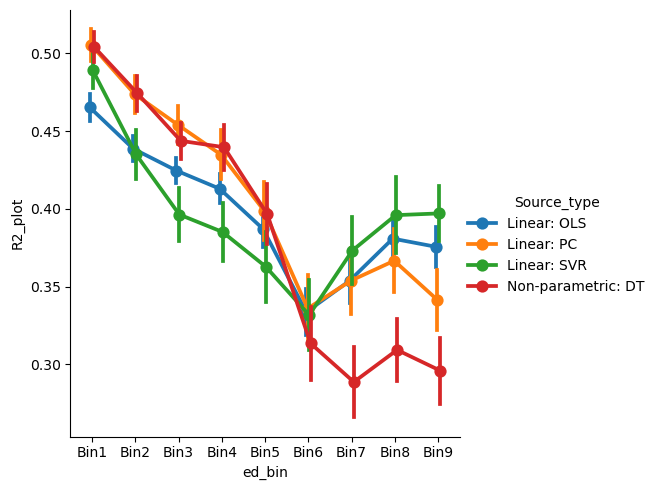

In [513]:
g = sns.catplot(kind='point', x='ed_bin', y='R2_plot', hue='Source_type', 
                dodge=True, estimator='mean',
                data=df_boots_yr_transect,
                errorbar=('se', 2))

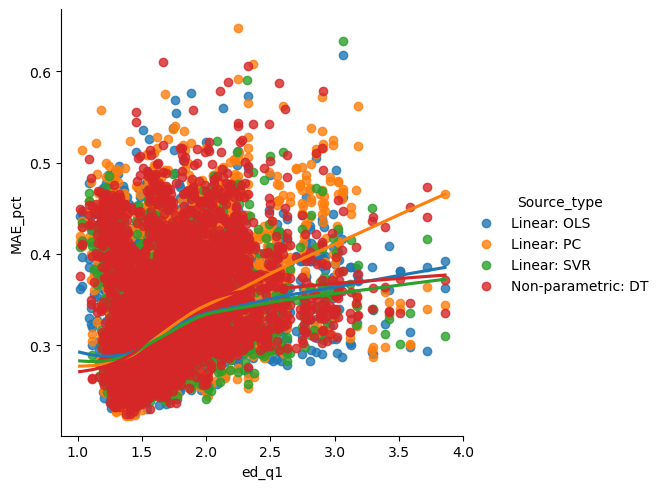

In [39]:
g = sns.lmplot(x='ed_q1', y='MAE_pct', hue='Source_type',
                data=df_boots_yr_transect, scatter=True, lowess=True)
#g.set(ylim=(0, 0.5))

In [77]:
df_tmp

0        True
1        True
2        True
3        True
4        True
        ...  
9642    False
9643    False
9644    False
9645    False
9646    False
Name: Year, Length: 9647, dtype: bool

## Euclidean distance of all years

In [173]:
df_year['sqrt_Biomass_kg_ha'] = np.sqrt(df_year['Biomass_kg_ha']) 
df_year.columns

Index(['Id', 'Pasture', 'Date', 'Date_mean', 'Year', 'Season', 'Low', 'High',
       'Biomass_kg_ha', 'geometry', 'NDVI', 'DFI', 'NDTI', 'SATVI', 'NDII7',
       'SAVI', 'RDVI', 'MTVI1', 'NCI', 'NDCI', 'PSRI', 'NDWI', 'EVI', 'TCBI',
       'TCGI', 'TCWI', 'BAI_126', 'BAI_136', 'BAI_146', 'BAI_236', 'BAI_246',
       'BAI_346', 'BLUE', 'GREEN', 'RED', 'NIR1', 'SWIR1', 'SWIR2',
       'CPER_2022', 'OLS_2022', 'OLS', 'LASSO', 'PLS', 'PCR', 'SVR', 'RF',
       'GBR', 'DNN', 'kfold', 'cv', 'sqrt_Biomass_kg_ha', 'PC1', 'PC2'],
      dtype='object')

In [174]:
var_names = ['NDVI', 'DFI', 'NDTI', 'SATVI', 'NDII7',
       'SAVI', 'RDVI', 'MTVI1', 'NCI', 'NDCI', 'PSRI', 'NDWI', 'EVI', 'TCBI',
       'TCGI', 'TCWI', 'BAI_126', 'BAI_136', 'BAI_146', 'BAI_236', 'BAI_246',
       'BAI_346', 'BLUE', 'GREEN', 'RED', 'NIR1', 'SWIR1', 'SWIR2']

In [194]:
X = df_year[var_names]
y = df_year['sqrt_Biomass_kg_ha']
features = var_names
X_scaled = StandardScaler().fit_transform(X)

pc = PLSRegression(n_components=len(var_names))
pc.fit(X_scaled, y)
scores = pc.x_scores_

#pc = PCA(n_components=5).fit(X_scaled)
#scores = pc.transform(X_scaled)
#pvars = pc.explained_variance_ratio_

pc_names = []
naY = y
r2_scores = []

for i in range(scores.shape[1]):
    pc_names.append('PC' + str(i+1)) 
    df_year['PC'+str(i+1)] = scores[:,i]
    Y_pred=np.dot(pc.x_scores_[:,i].reshape(-1,1), pc.y_loadings_[:,i].reshape(-1,1).T)*naY.std(axis=0, ddof=1)+naY.mean(axis=0)
    r2_scores.append(round(r2_score(y, Y_pred),3))

In [195]:
yr = 2023

In [196]:
df_year_centroids = df_year[df_year['Year'] == yr][pc_names].mean(axis=0)
df_other_centroids = df_year[df_year['Year'] != yr].groupby('Year')[pc_names].mean()#.apply(lambda x: x[pc_names].mean(axis=0))
np.mean(np.sqrt(np.sum((df_year_centroids - df_other_centroids)**2, axis=1)))

4.1899200916350035

In [227]:
np.sqrt(np.sum(r2_scores*(df_year_centroids - df_other_centroids)**2, axis=1))

Year
2014    0.561329
2015    0.580322
2016    1.607309
2017    1.238247
2018    1.880067
2019    2.168825
2020    4.975786
2021    2.532489
2022    4.275330
dtype: float64

In [229]:
#df_year['ed'] = np.nan
for yr in notebook.tqdm(df_year['Year'].unique()):
    df_year_centroids = df_year[df_year['Year'] == yr][pc_names].mean(axis=0)
    df_other_centroids = df_year[df_year['Year'] != yr].groupby('Year')[pc_names].mean()
    ed = np.min(np.sqrt(np.sum(r2_scores*(df_year_centroids - df_other_centroids)**2, axis=1)))
    df_year.loc[df_year['Year'] == yr, 'ed_mean'] = ed

  0%|          | 0/10 [00:00<?, ?it/s]

<Axes: xlabel='Year', ylabel='ed_mean'>

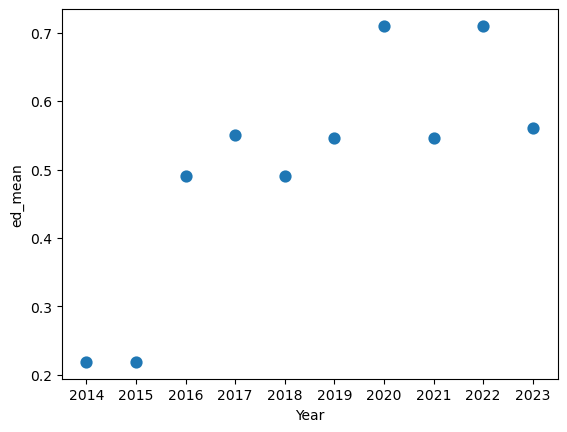

In [230]:
sns.pointplot(x='Year', y='ed_mean', data=df_year, estimator='mean', errorbar=('se', 2), linestyles='none')

In [72]:
df_year['ed'] = np.nan
for yr in notebook.tqdm(df_year['Year'].unique()):
    df_year_sub = df_year[df_year['Year'] == yr]
    for idx, row in df_year_sub.iterrows():
        point = row[pc_names].values.astype(float)
        other_points = df_year[df_year['Year'] != yr][pc_names].values.astype(float)
        # Calculate squared distances using broadcasting
        sum_distances = np.sum(r2_scores*np.sqrt((other_points - point) ** 2), axis=1)
        # Calculate distances using square root
        distances = (sum_distances)
        df_year.loc[idx, 'ed_mean'] = np.mean(distances)
        df_year.loc[idx, 'ed_median'] = np.median(distances)
        df_year.loc[idx, 'ed_q1'] = np.quantile(distances, 0.2)

  0%|          | 0/10 [00:00<?, ?it/s]

<Axes: xlabel='Year', ylabel='ed_mean'>

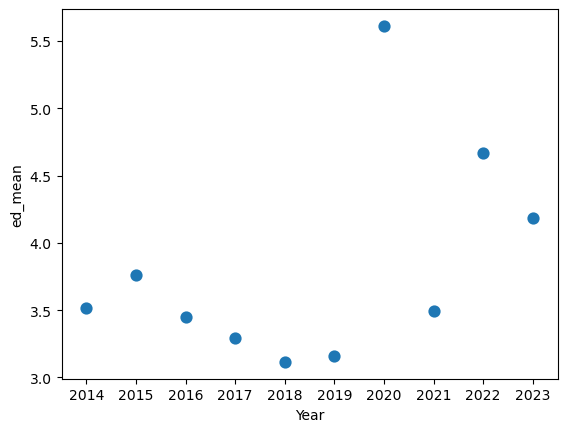

In [190]:
sns.pointplot(x='Year', y='ed_mean', data=df_year, estimator='mean', errorbar=('se', 2), linestyles='none')

In [126]:
import numpy as np

# Single point
point = df_year.iloc[0][pc_names].values.astype(float)

In [132]:
other_points = df_year.iloc[100:1120][pc_names].values.astype(float)

In [133]:
point

array([-8.4854848 , -0.04471776, -2.87938084,  0.47572877, -0.32322992])

In [134]:
# Multiple points (notice the 2D array)
#other_points = np.array([[1, 2], [5, 6]])

# Calculate squared distances using broadcasting
squared_distances = np.sum((other_points - point) ** 2, axis=1)

# Calculate distances using square root
distances = np.sqrt(squared_distances)

# Print the distances (one for each point in other_points)
print(distances)

[3.47536228 4.5406847  5.41667872 ... 2.99712738 5.76151172 4.84195031]


## Euclidean distance of individual predictions

In [26]:
df_year['sqrt_Biomass_kg_ha'] = np.sqrt(df_year['Biomass_kg_ha']) 
df_year.columns

Index(['Id', 'Pasture', 'Date', 'Date_mean', 'Year', 'Season', 'Low', 'High',
       'Biomass_kg_ha', 'geometry', 'NDVI', 'DFI', 'NDTI', 'SATVI', 'NDII7',
       'SAVI', 'RDVI', 'MTVI1', 'NCI', 'NDCI', 'PSRI', 'NDWI', 'EVI', 'TCBI',
       'TCGI', 'TCWI', 'BAI_126', 'BAI_136', 'BAI_146', 'BAI_236', 'BAI_246',
       'BAI_346', 'BLUE', 'GREEN', 'RED', 'NIR1', 'SWIR1', 'SWIR2',
       'CPER_2022', 'OLS_2022', 'OLS', 'LASSO', 'PLS', 'PCR', 'SVR', 'RF',
       'GBR', 'DNN', 'kfold', 'cv', 'sqrt_Biomass_kg_ha', 'PC1', 'PC2'],
      dtype='object')

In [27]:
var_names = ['NDVI', 'DFI', 'NDTI', 'SATVI', 'NDII7',
       'SAVI', 'RDVI', 'MTVI1', 'NCI', 'NDCI', 'PSRI', 'NDWI', 'EVI', 'TCBI',
       'TCGI', 'TCWI', 'BAI_126', 'BAI_136', 'BAI_146', 'BAI_236', 'BAI_246',
       'BAI_346', 'BLUE', 'GREEN', 'RED', 'NIR1', 'SWIR1', 'SWIR2']

In [82]:
#df_year

In [86]:
@dask.delayed
def bootstrap_pls_dist_indiv(i, df_boot, df_hls, x_vars=var_names,
                       y_var='sqrt_Biomass_kg_ha', cv_var='Year', train_col='yr_train', test_col='yr_test'):
    dfs_out = []
    idxs_out = []
    yrs_train = [int(x) for x in i[1:-1].split(' ')]
    X = df_hls[df_hls[cv_var].isin(yrs_train)][x_vars]
    y = df_hls[df_hls[cv_var].isin(yrs_train)][y_var]
    scaler = StandardScaler().fit(X)
    X_scaled = scaler.transform(X)
    pc = PLSRegression(n_components=5)
    pc.fit(X_scaled, y)
    for yr in df_boot[df_boot[train_col] == i][test_col].unique():
        df_tmp = df_hls[df_hls[cv_var].isin(yrs_train + [yr])].copy()
        scores = pc.transform(scaler.transform(df_tmp[var_names]))
    
        pc_names = []
        naY = y
        r2_scores = []
        
        for j in range(scores.shape[1]):
            pc_names.append('PC' + str(j+1)) 
            df_tmp['PC'+str(j+1)] = scores[:,j]
            Y_pred=np.dot(pc.x_scores_[:,j].reshape(-1,1), pc.y_loadings_[:,j].reshape(-1,1).T)*naY.std(axis=0, ddof=1)+naY.mean(axis=0)
            r2_scores.append(round(r2_score(y, Y_pred),3))
    
        df_year_sub = df_tmp[df_tmp[cv_var] == yr]
        #df_year_others = df_tmp[df_tmp[cv_var] != yr]
        distances_mean = []
        distances_median = []
        distances_q25 = []
        distances_q10 = []
        distances_q2 = []
        for _, row in df_year_sub.iterrows():
            point = row[pc_names].values.astype(float)
            other_points = df_tmp[df_tmp[cv_var] != yr][pc_names].values.astype(float)
            # Calculate squared distances using broadcasting
            #sum_distances = np.sum(r2_scores*np.sqrt((other_points - point) ** 2), axis=1)
            #avg_distances = np.average(np.sqrt((other_points - point) ** 2), weights=r2_scores, axis=1)
            ec_wdistances = np.sqrt(np.sum(r2_scores*(other_points - point) ** 2, axis=1))
            distances_mean.append(np.mean(ec_wdistances))
            distances_median.append(np.median(ec_wdistances))
            distances_q25.append(np.quantile(ec_wdistances, 0.25))
            distances_q10.append(np.quantile(ec_wdistances, 0.10))
            distances_q2.append(np.quantile(ec_wdistances, 0.02))
        X_sub = df_year_sub[x_vars]
        X_sub_scaled = scaler.transform(X_sub)
        preds = pc.predict(X_sub_scaled)
        dfs_out.append(pd.DataFrame({
            'numb_yrs': len(i.split(' ')),
            train_col: i,
            test_col: yr,
            'Predicted': preds,
            'Observed': df_year_sub[y_var],
            'distances_mean': distances_mean,
            'distances_median': distances_median,
            'distances_q25': distances_q25,
            'distances_q10': distances_q10,
            'distances_q2': distances_q2
        },
                      index=np.arange(0, len(preds))))
        #idxs_out.append(df_boot.loc[(df_boot[train_col] == i) &
        #                (df_boot[test_col] == yr)].index)
    df_out = pd.concat(dfs_out, ignore_index=True)
    return df_out

In [87]:
results_tmp = [bootstrap_pls_dist_indiv(x, df_boots_yr_transect, df_year) for x in df_boots_yr_transect['yr_train'].unique()]

In [88]:
results = dask.compute(*results_tmp)

In [89]:
df_dist_indiv = pd.concat(results, ignore_index=True)

In [90]:
df_dist_indiv[~df_dist_indiv['Observed'].isnull()].groupby(['numb_yrs', 'yr_test']).count()

yr_train  Predicted  Observed  distances_mean  \
numb_yrs yr_test                                                  
2        2014        31104      31104     31104           31104   
         2015          576        576       576             576   
3        2014        72576      72576     72576           72576   
         2015         1344       1344      1344            1344   
4        2014       108864     108864    108864          108864   
         2015         2016       2016      2016            2016   
5        2014       108864     108864    108864          108864   
         2015         2016       2016      2016            2016   
6        2014        72576      72576     72576           72576   
         2015         1344       1344      1344            1344   
7        2014        31104      31104     31104           31104   
         2015          576        576       576             576   
8        2014         7776       7776      7776            7776   
         2015          144        144       144             144   
9        2014          864        864       864             864   
         2015           16         16        16              16   

                  distances_median  distances_q25  distances_q10  distances_q2  
numb_yrs yr_test                                                                
2        2014                31104          31104          31104         31104  
         2015                  576            576            576           576  
3        2014                72576          72576          72576         72576  
         2015                 1344           1344           1344          1344  
4        2014               108864         108864         108864        108864  
         2015                 2016           2016           2016          2016  
5        2014               108864         108864         108864        108864  
         2015                 2016           2016           2016          2016  
6        2014                72576          72576          72576         72576  
         2015                 1344           1344           1344          1344  
7        2014                31104          31104          31104         31104  
         2015                  576            576            576           576  
8        2014                 7776           7776           7776          7776  
         2015                  144            144            144           144  
9        2014                  864            864            864           864  
         2015                   16             16             16            16

In [91]:
df_dist_indiv# = df_dist_indiv[~df_dist_indiv['Observed'].isnull()].copy()

numb_yrs                                        yr_train  yr_test  \
0               2                                     [2015 2016]     2014   
1               2                                     [2015 2016]     2014   
2               2                                     [2015 2016]     2014   
3               2                                     [2015 2016]     2014   
4               2                                     [2015 2016]     2014   
...           ...                                             ...      ...   
4842789         9  [2014 2015 2016 2017 2018 2019 2020 2021 2022]     2023   
4842790         9  [2014 2015 2016 2017 2018 2019 2020 2021 2022]     2023   
4842791         9  [2014 2015 2016 2017 2018 2019 2020 2021 2022]     2023   
4842792         9  [2014 2015 2016 2017 2018 2019 2020 2021 2022]     2023   
4842793         9  [2014 2015 2016 2017 2018 2019 2020 2021 2022]     2023   

         Predicted   Observed  distances_mean  distances_median  \
0        41.625272  35.781039        5.035972          5.093309   
1        34.011432  39.458992        3.171597          3.241365   
2        28.869392  27.313363        2.496591          2.571529   
3        27.165781  26.783380        2.868473          3.061992   
4        26.751125  35.893127        2.799636          2.942262   
...            ...        ...             ...               ...   
4842789  31.703516        NaN        2.599674          2.395181   
4842790  30.379562        NaN        2.543689          2.323436   
4842791  30.348155        NaN        2.597443          2.319651   
4842792  28.499206        NaN        2.467797          2.222687   
4842793  28.270311        NaN        2.606834          2.238224   

         distances_q25  distances_q10  distances_q2  
0             3.385169       2.289775      1.112819  
1             1.606537       0.962019      0.498257  
2             1.497945       0.981752      0.566999  
3             1.801586       1.283827      0.702491  
4             1.815973       1.298247      0.739276  
...                ...            ...           ...  
4842789       1.473005       0.938838      0.495932  
4842790       1.401716       0.880748      0.469110  
4842791       1.368927       0.887362      0.484397  
4842792       1.323576       0.805305      0.449266  
4842793       1.289029       0.832583      0.449239  

[4842794 rows x 10 columns]

In [41]:
#df_dist_indiv['numb_yrs'] = df_dist_indiv.apply(lambda x: len(x['yr_train'].split(' ')), axis=1)

In [48]:
len(df_dist_indiv['Predicted'].iloc[0])

864

In [142]:
client.cluster.close()
client.close()

In [194]:
X = df_year[var_names]
y = df_year['sqrt_Biomass_kg_ha']
features = var_names
X_scaled = StandardScaler().fit_transform(X)

pc = PLSRegression(n_components=len(var_names))
pc.fit(X_scaled, y)
scores = pc.x_scores_

#pc = PCA(n_components=5).fit(X_scaled)
#scores = pc.transform(X_scaled)
#pvars = pc.explained_variance_ratio_

pc_names = []
naY = y
r2_scores = []

for i in range(scores.shape[1]):
    pc_names.append('PC' + str(i+1)) 
    df_year['PC'+str(i+1)] = scores[:,i]
    Y_pred=np.dot(pc.x_scores_[:,i].reshape(-1,1), pc.y_loadings_[:,i].reshape(-1,1).T)*naY.std(axis=0, ddof=1)+naY.mean(axis=0)
    r2_scores.append(round(r2_score(y, Y_pred),3))

## Individual models

<Axes: xlabel='cv', ylabel='R^2'>

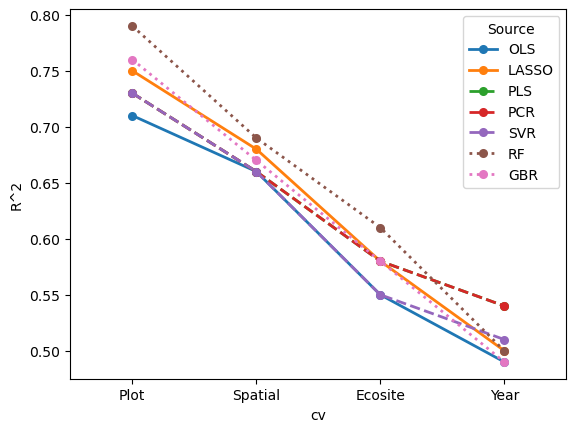

In [8]:
sns.pointplot(x='cv', y='R^2', data=t_all, hue='Source',
              linestyles=['solid', 'solid', 'dashed', 'dashed', 'dashed', 'dotted', 'dotted'],
              linewidth=2)

<Axes: xlabel='cv', ylabel='MAE_bt'>

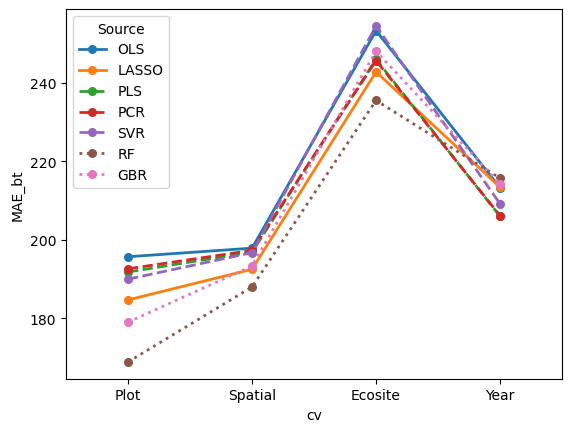

In [9]:
sns.pointplot(x='cv', y='MAE_bt', data=t_all, hue='Source',
              linestyles=['solid', 'solid', 'dashed', 'dashed', 'dashed', 'dotted', 'dotted'],
              linewidth=2)

<Axes: xlabel='cv', ylabel='MAE_bt_pct'>

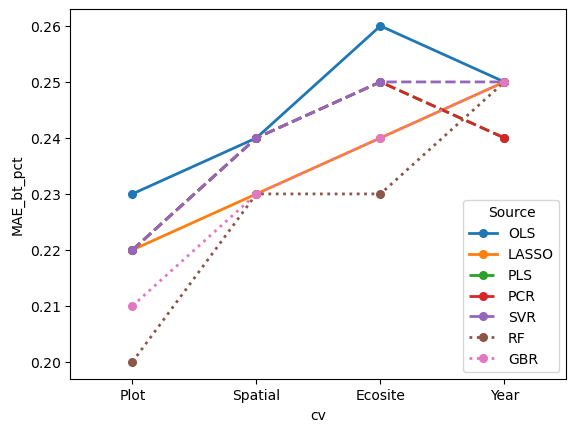

In [10]:
sns.pointplot(x='cv', y='MAE_bt_pct', data=t_all, hue='Source',
              linestyles=['solid', 'solid', 'dashed', 'dashed', 'dashed', 'dotted', 'dotted'],
              linewidth=2)

<Axes: xlabel='cv', ylabel='r'>

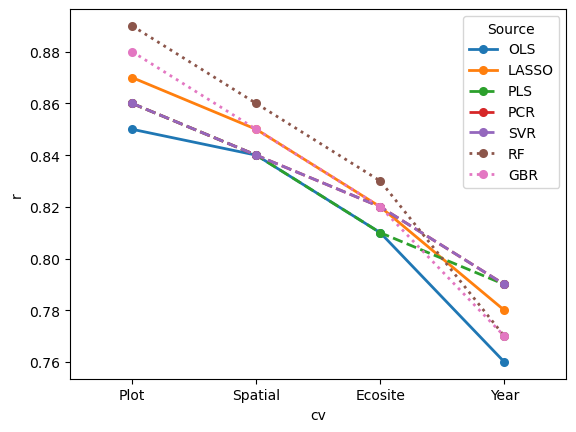

In [11]:
sns.pointplot(x='cv', y='r', data=t_all, hue='Source',
              linestyles=['solid', 'solid', 'dashed', 'dashed', 'dashed', 'dotted', 'dotted'],
              linewidth=2)